**Lab | Cleaning Numerical Data**

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


3. First look at its main features (head, shape, info).


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).


In [7]:
cols = []
for colname in customer_df.columns:
    cols.append(colname.lower().replace(" ","_"))
  
customer_df.columns = cols
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change the type of effective_to_date column to DateTime format.


In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [9]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Check NaN values per column.


In [10]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [11]:
def split_num_cat(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    numerical_columns = df.select_dtypes(np.number).columns.tolist()
    
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    numerical_df = df[numerical_columns]
    categorical_df = df[categorical_columns]
    
    return categorical_df, numerical_df




In [12]:
categorical_df, numerical_df = split_num_cat(customer_df)


In [13]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [14]:
numerical_df 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


8. Drop any ID column.

In [15]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
customer_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [17]:
categorical_df = categorical_df.drop(columns=['customer'], axis=1)

In [18]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [19]:
numerical_df = customer_df.select_dtypes(np.number)

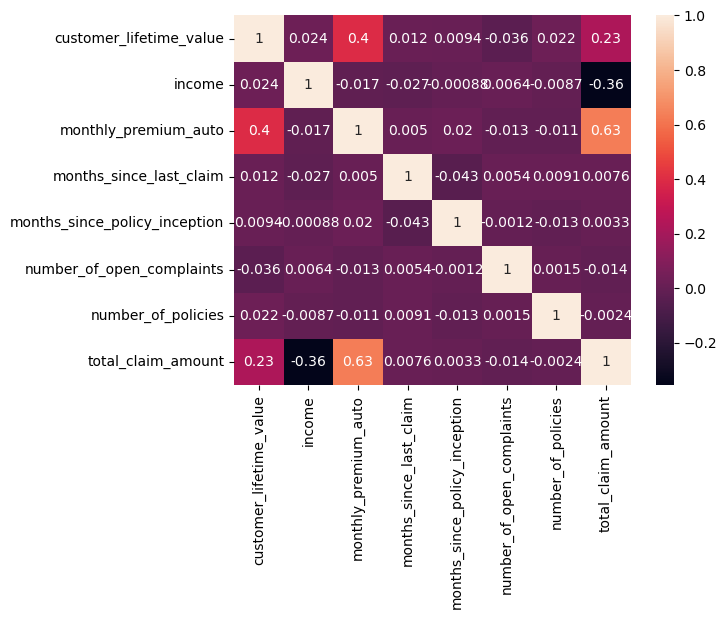

In [20]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [21]:
# It makes totally sense that monthly premium auto is highly correlated to total claim amount as the higher is the cost is the policy the higher is the amount the customer is entitled to receive after an accident.

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [22]:
def split_dataframe(df: pd.DataFrame, threshold: int=36)-> tuple[pd.DataFrame, pd.DataFrame]:
    # Initialize two empty DataFrames
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    # Iterate over each column in the input DataFrame
    for column in df.columns:
        # Check if the column data type is numeric
        if np.issubdtype(df[column].dtype, np.number):
            # If the number of unique values is above the threshold, it's continuous
            if df[column].nunique() > threshold:
                continuous_df = pd.concat([continuous_df, df[column]], axis=1)
            # Otherwise, it's discrete
            else:
                discrete_df = pd.concat([discrete_df, df[column]], axis=1)

    display(continuous_df)
    display(discrete_df)
    return continuous_df, discrete_df

In [23]:
continuous_df, discrete_df = split_dataframe(customer_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

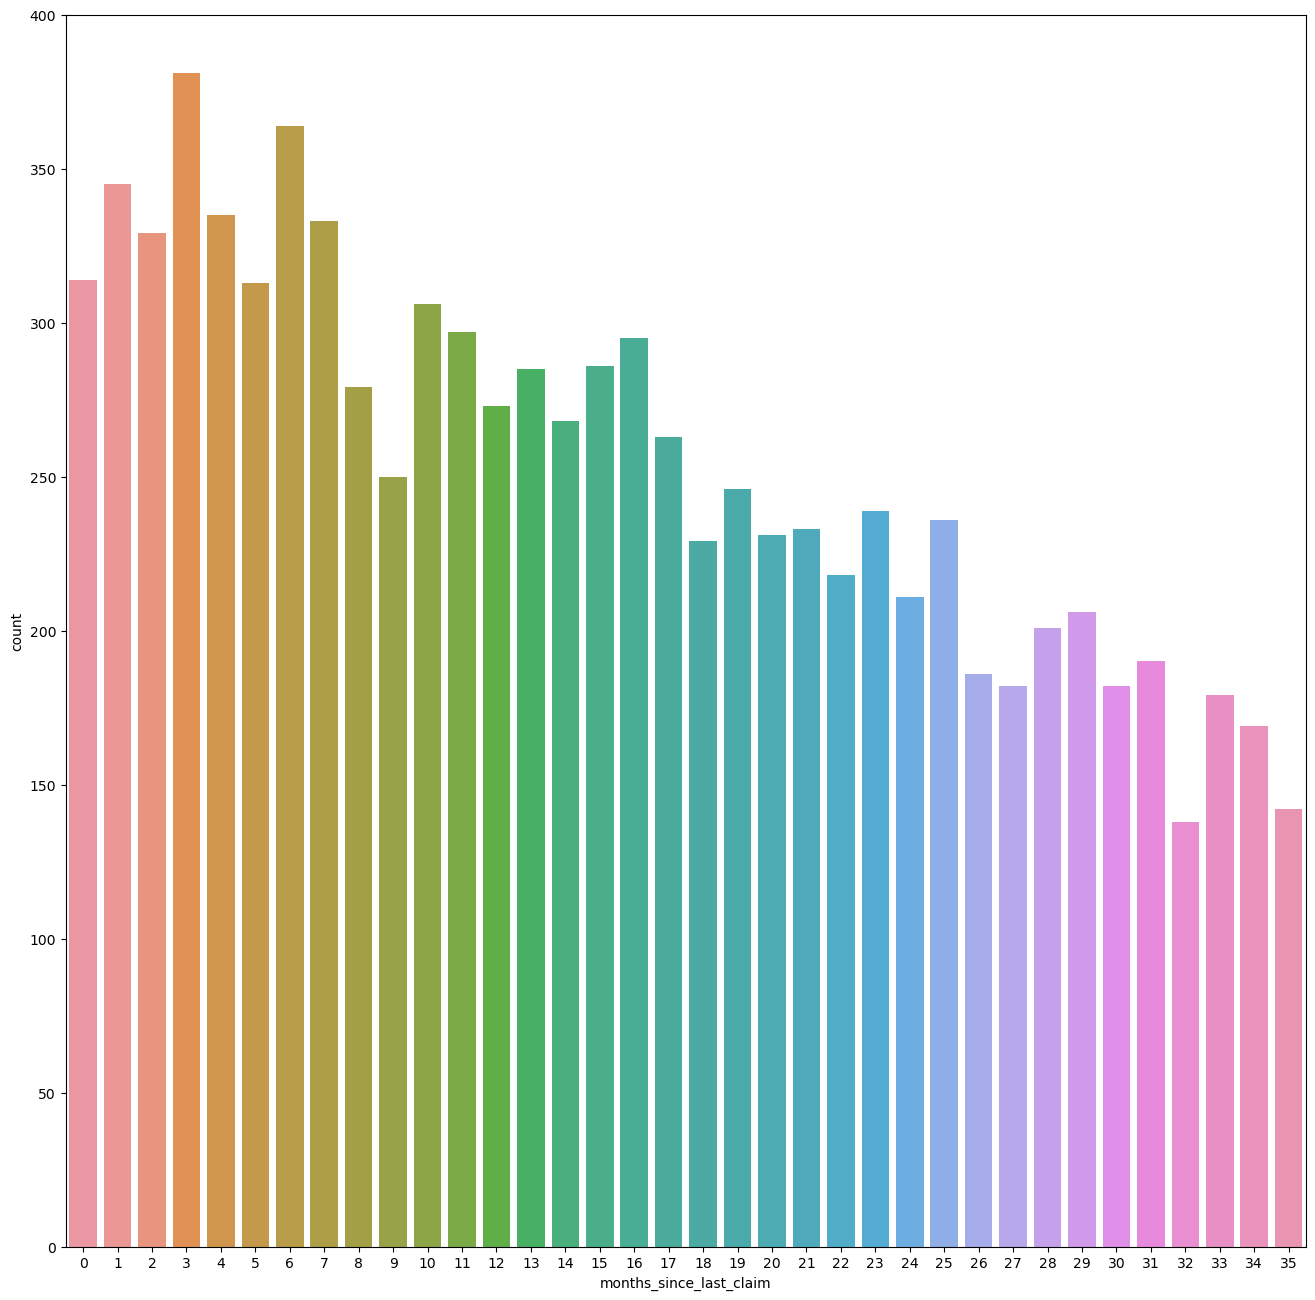

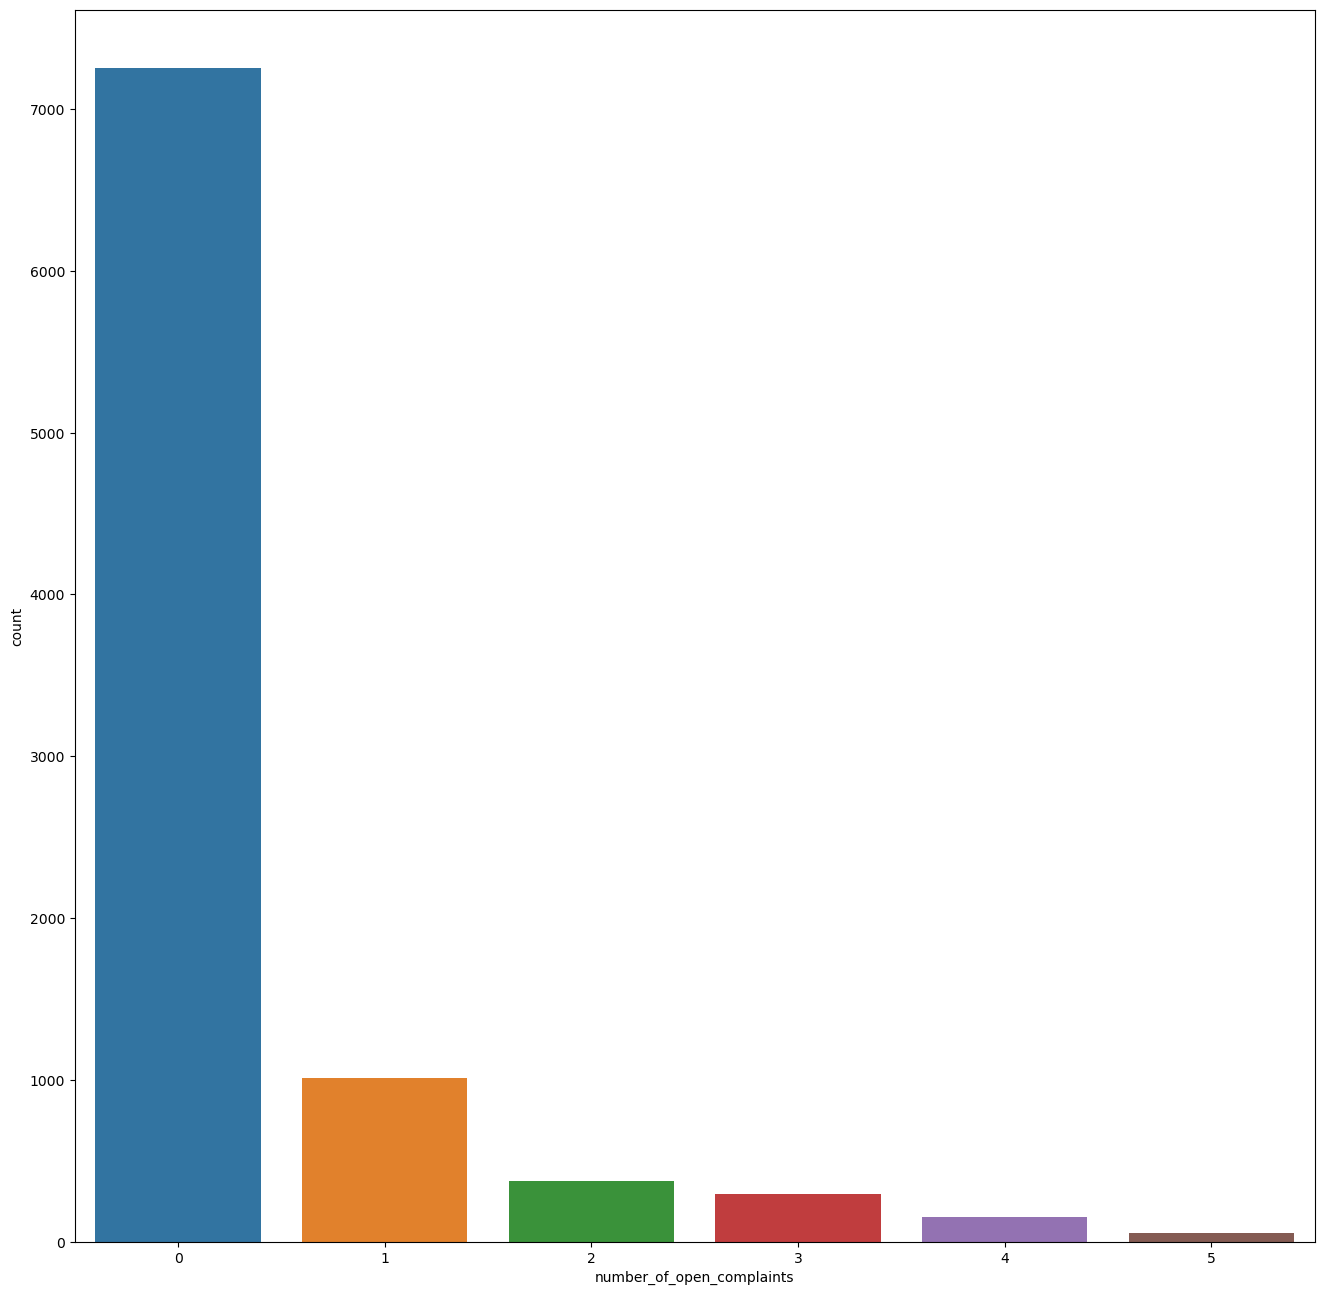

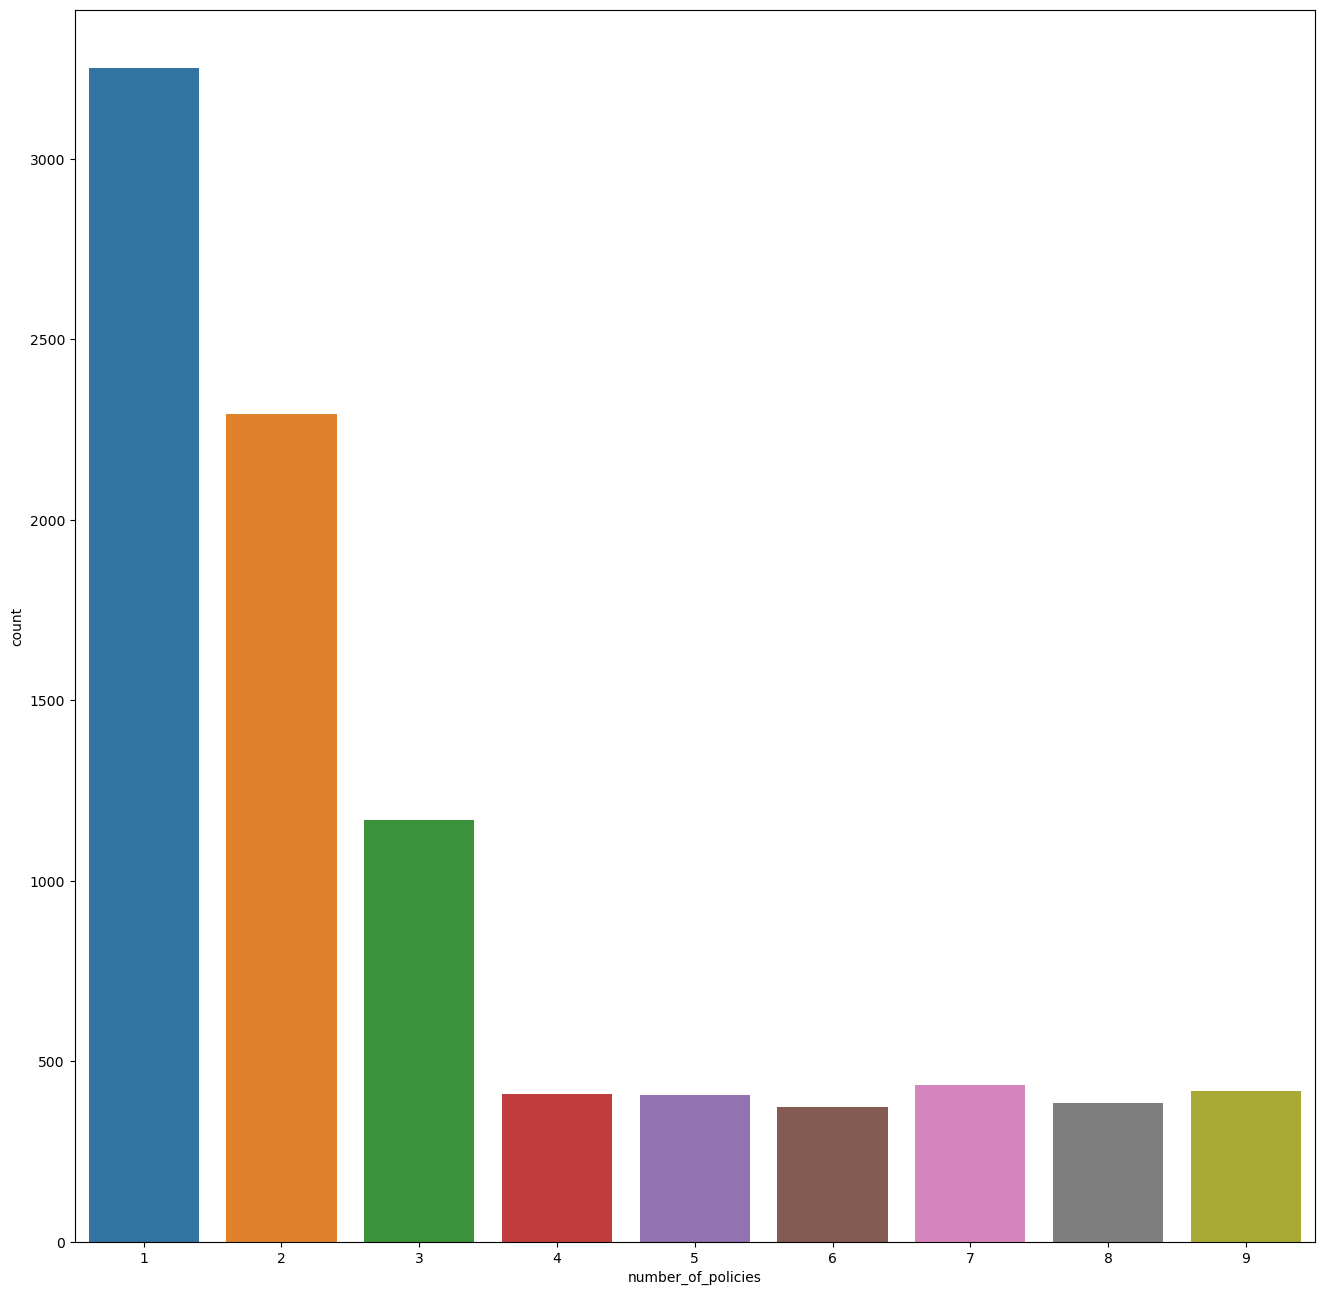

In [24]:
# plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
selected_columns1 = discrete_df.columns 
for column in selected_columns1:
    fig, ax = plt.subplots( figsize=(16,16))
    sns.countplot(x=column,  data=discrete_df, ax=ax)
    plt.show()
    

12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)


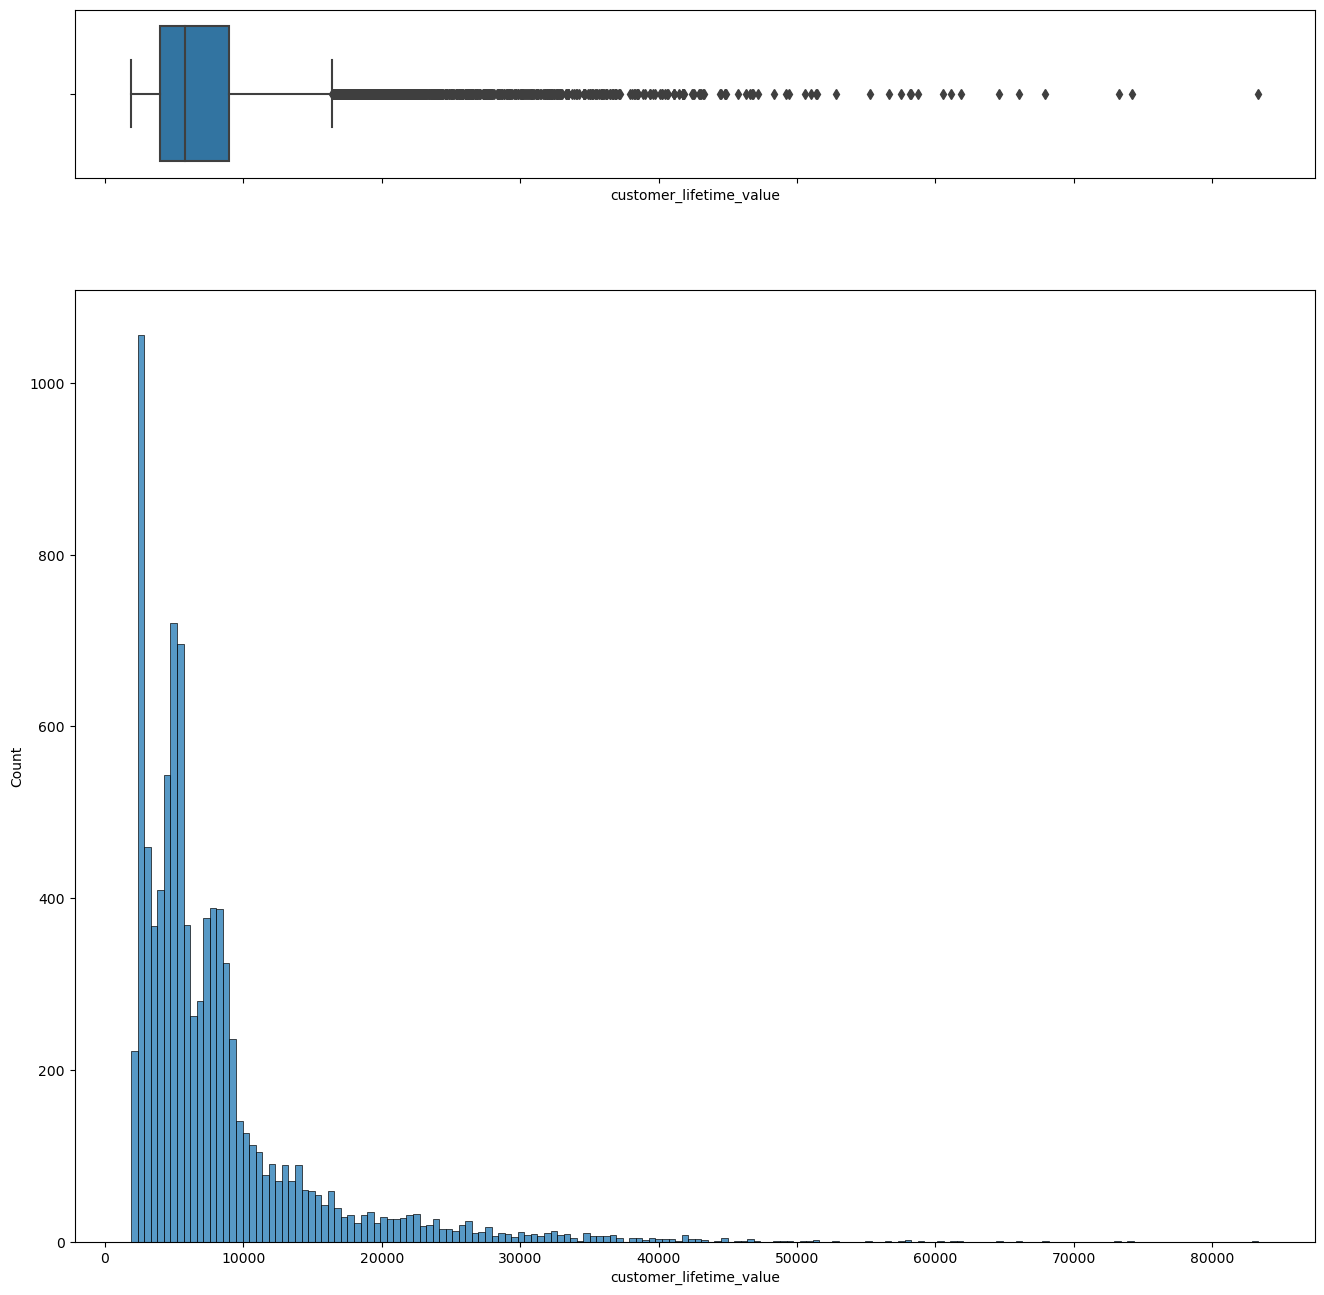

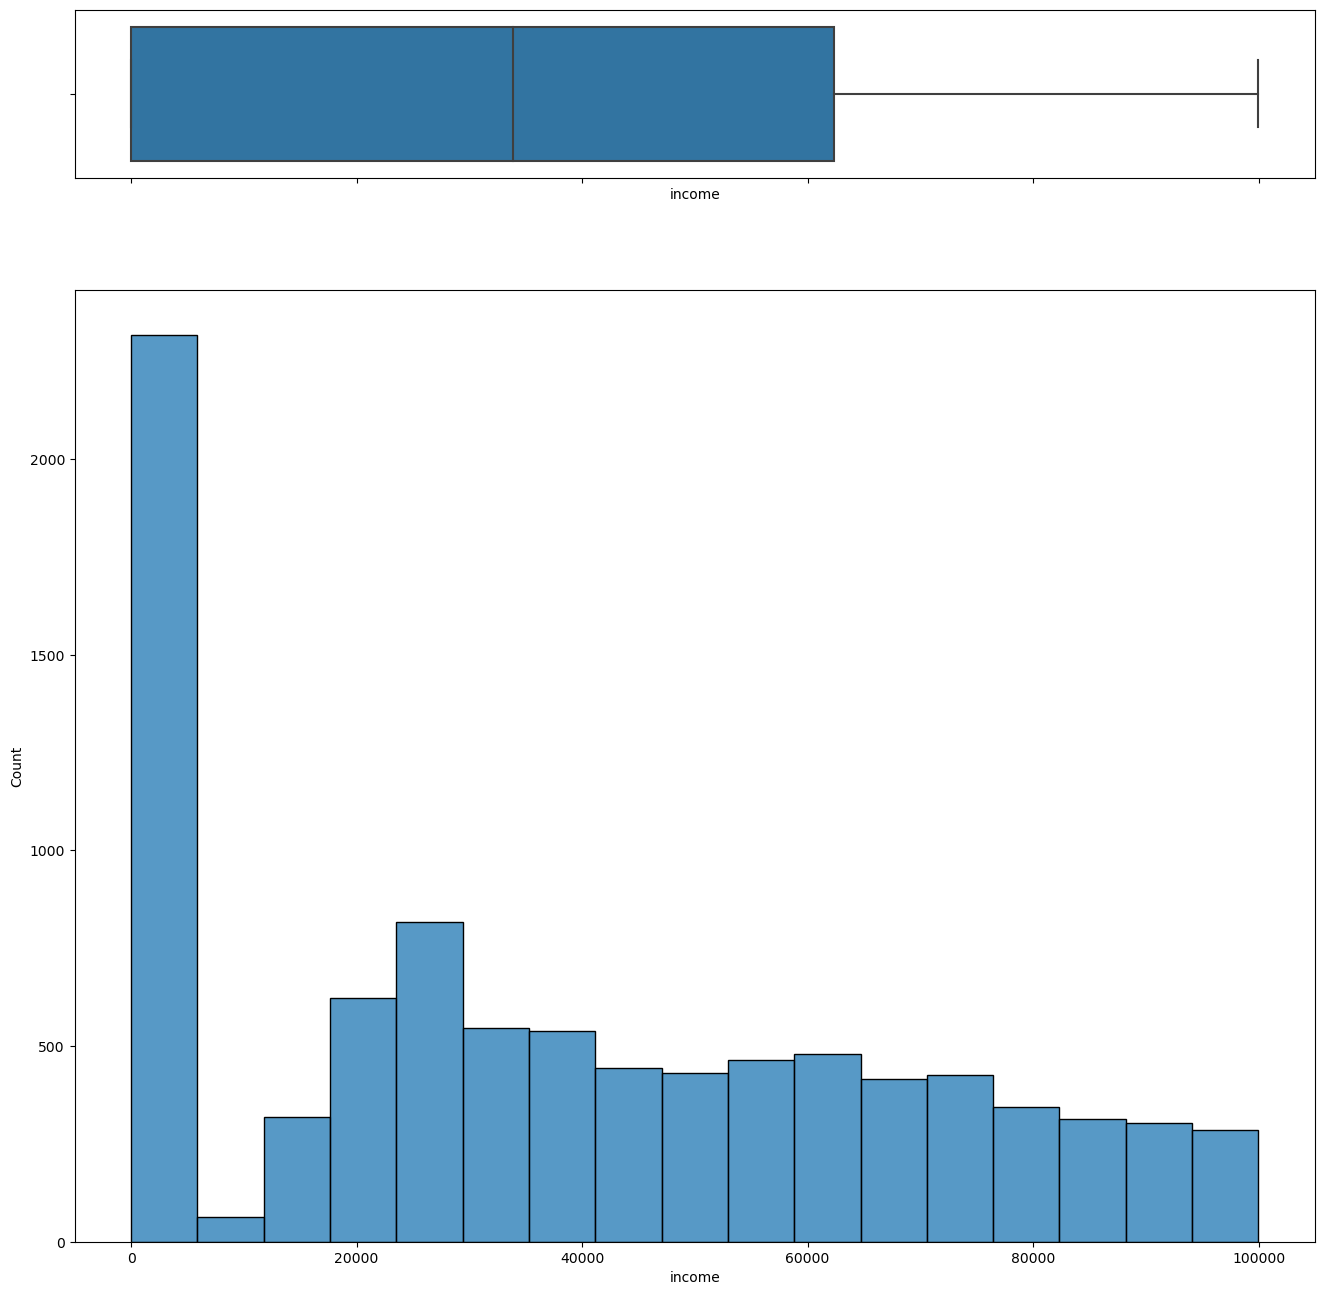

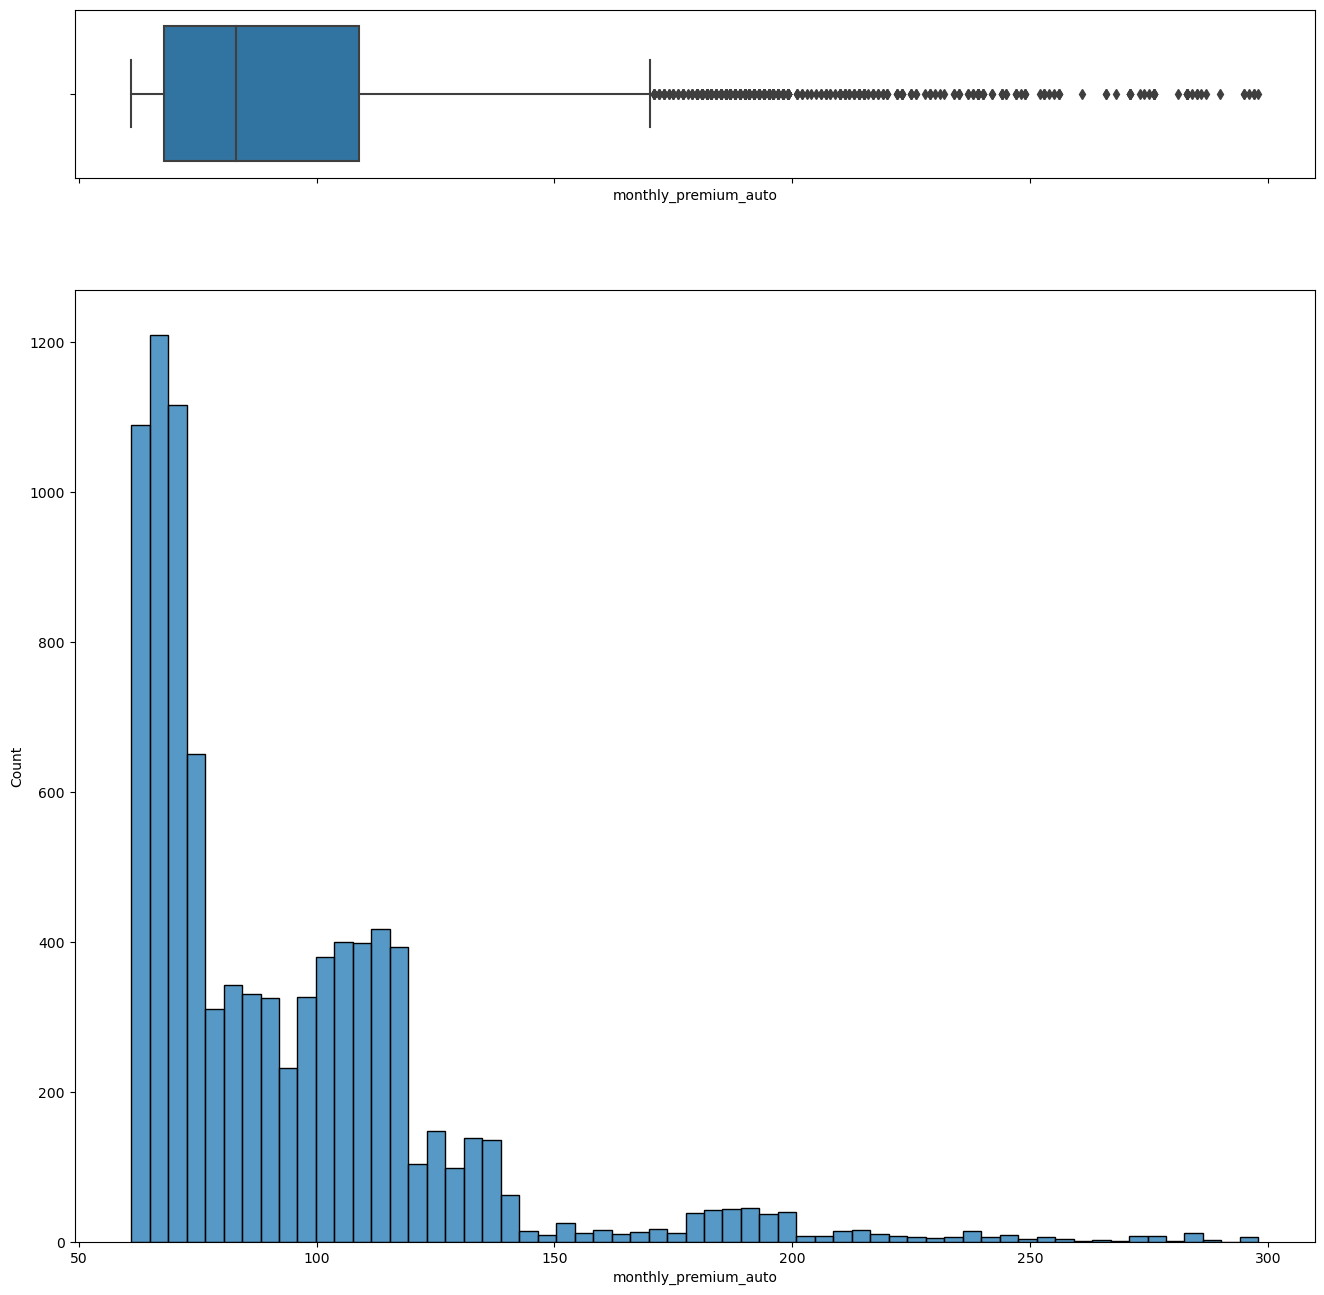

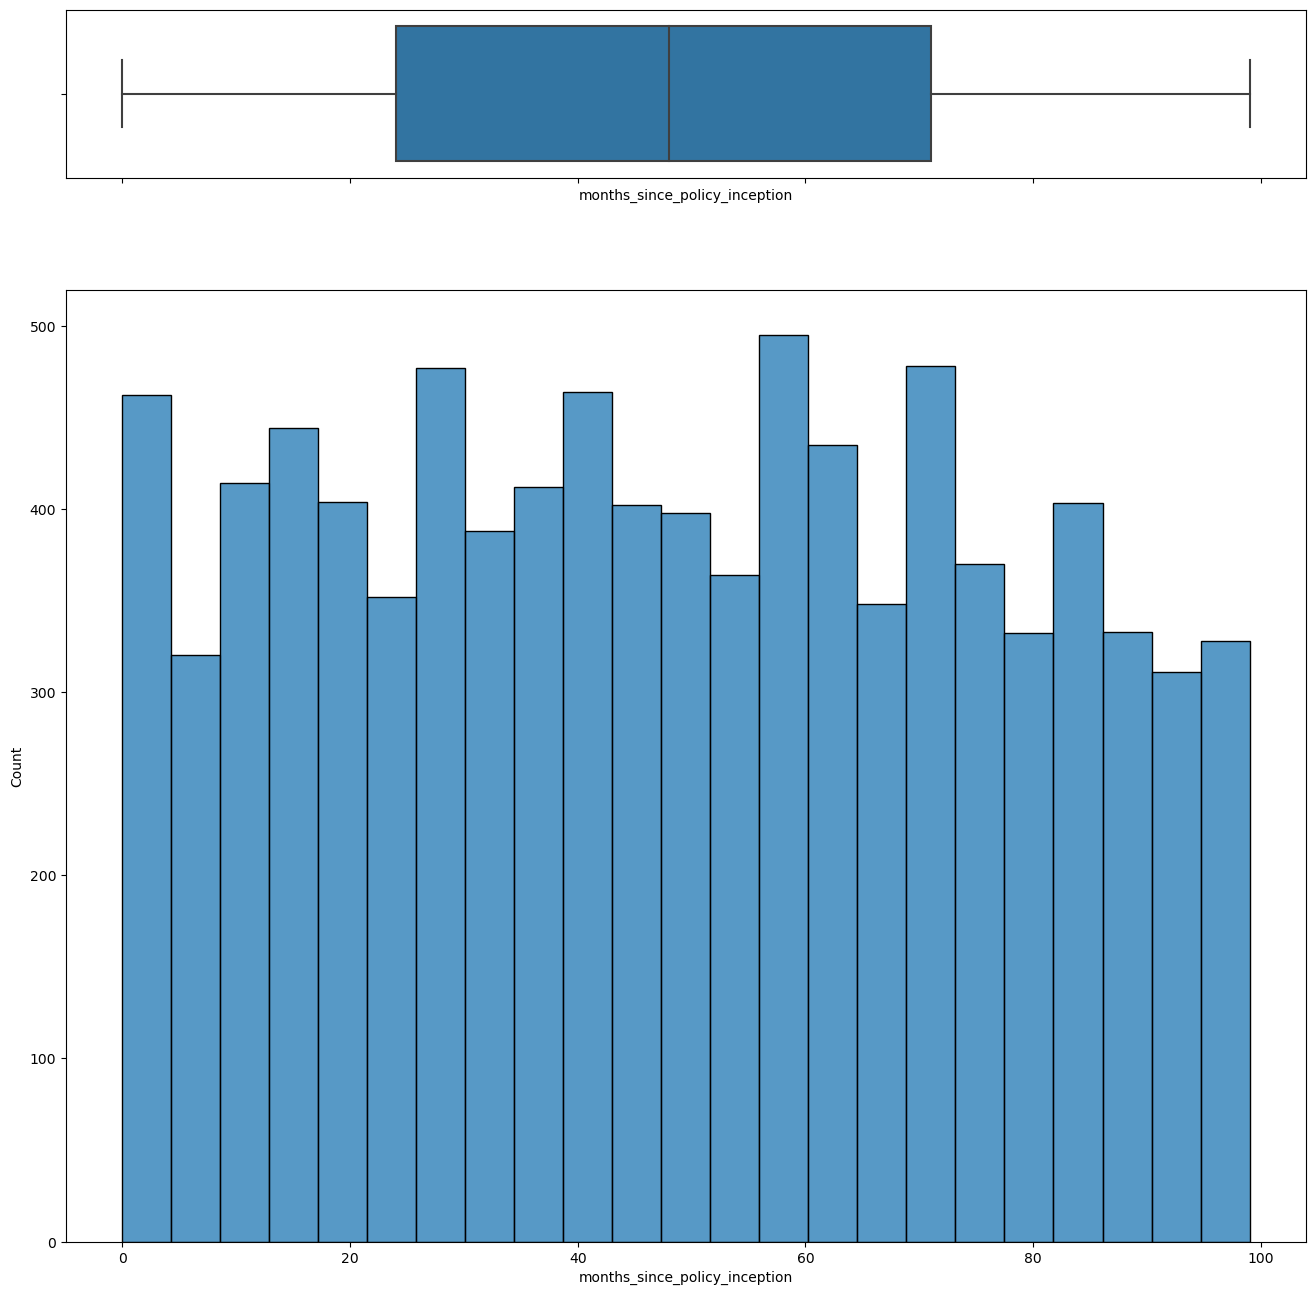

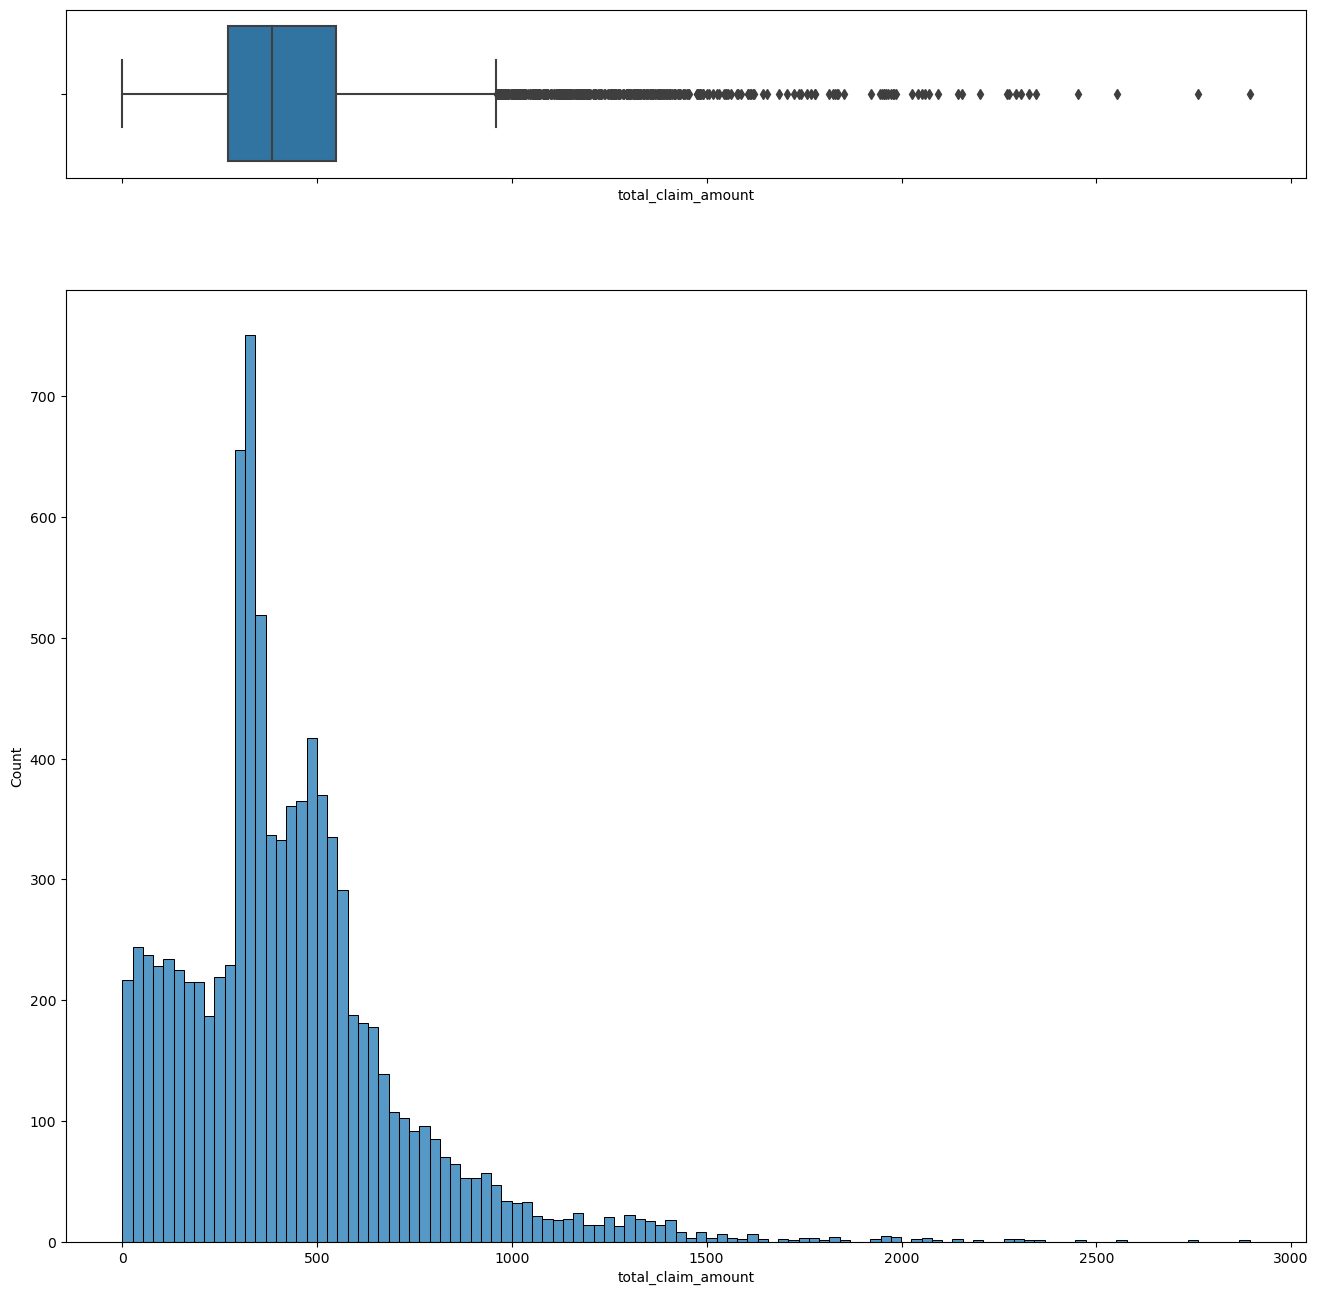

In [25]:
selected_columns = continuous_df.columns
for column in selected_columns:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(16,16))
    sns.boxplot(data=continuous_df, x=column, ax=ax_box)
    sns.histplot(data=continuous_df, x=column, ax=ax_hist)
    plt.show()

13. According to the previous histogram plots, do you think that you will have to apply any transformation?


In [26]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

As we can see, all the columns explored have a strongly skewed distribution. This shows us that we will have to apply transformers before trying to train any machine learning model. In addition, most of them have outliers displayed as isolated dots in the boxplots. In fact, the following columns:
'customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount' show clear outliers.

14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.


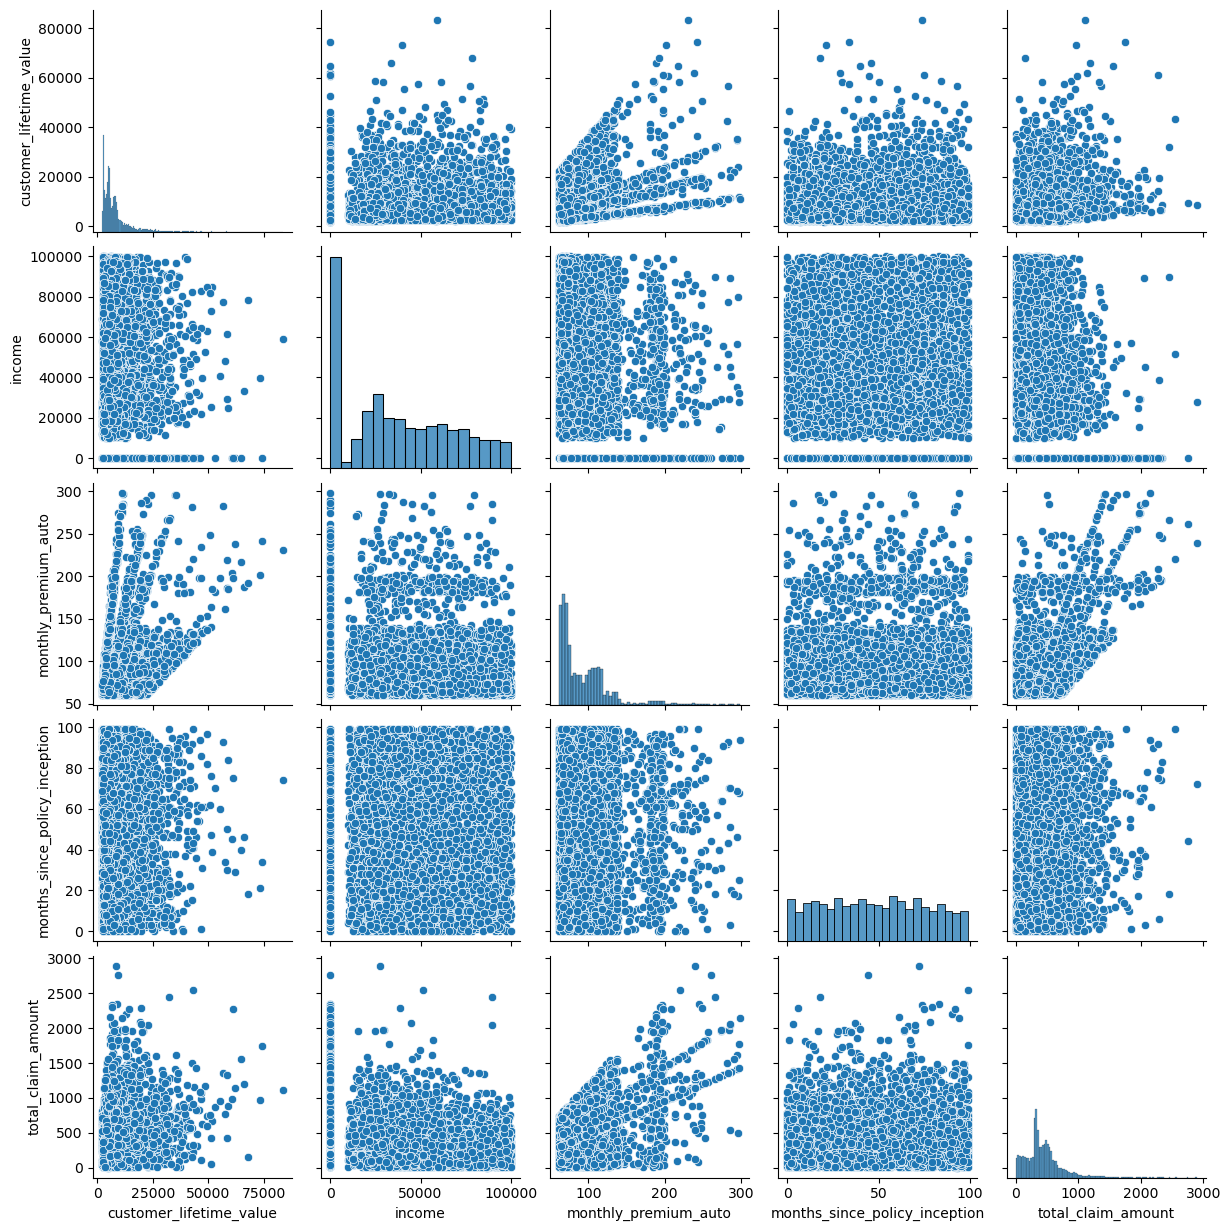

In [27]:
selected_columns2 = continuous_df.columns
sns.pairplot(data=continuous_df[selected_columns2])

In [28]:
def get_skewed_columns(df: pd.DataFrame) -> list:
    '''
    This function will consider the numerical columns of a Pandas DataFrame and it will display a tuple of (Boolean, Skew)
    for every column. In addition, it will return a list of the column_names that have an skewness > < 2

    Input:
    df: Pandas DataFrame

    Output:
    list
    '''

    df2 = df.copy()

    my_list = [ ( column, ( df2[column].skew() > 2) or (df2[column].skew() < -2), df2[column].skew().round(1) ) for column in df2.select_dtypes(np.number).columns]

    for element in my_list:
        print(element)

    return [element[0] for element in my_list if element[1]==True]

In [29]:
skewed_columns = get_skewed_columns(continuous_df)
skewed_columns

('customer_lifetime_value', True, 3.0)
('income', False, 0.3)
('monthly_premium_auto', True, 2.1)
('months_since_policy_inception', False, 0.0)
('total_claim_amount', False, 1.7)


['customer_lifetime_value', 'monthly_premium_auto']

## Lab Cleaning Categorical Data

Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(df: pd.DataFrame):
    for col in df.columns:
        if df[col].dtype == 'object':
            plt.figure(figsize=(10,6))
            order = df[col].value_counts().index
            if df[col].nunique() >= 6:
                sns.countplot(data=df, y=col, order=order)
            else:
                sns.countplot(data=df, x=col, order=order)
            plt.title(f'Countplot of {col}')
            plt.show()

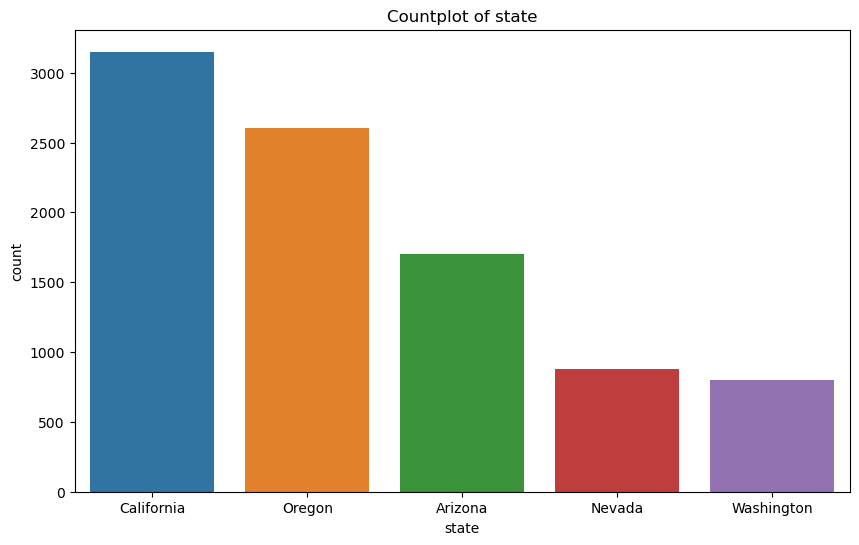

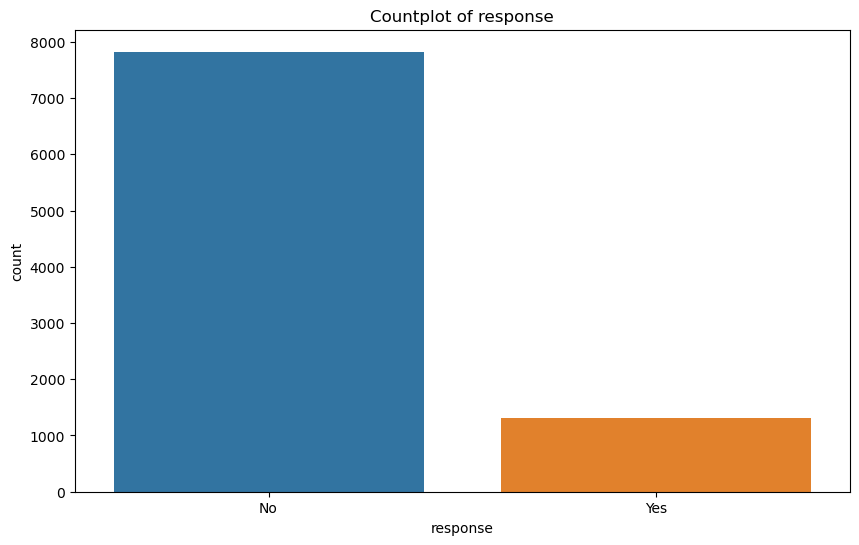

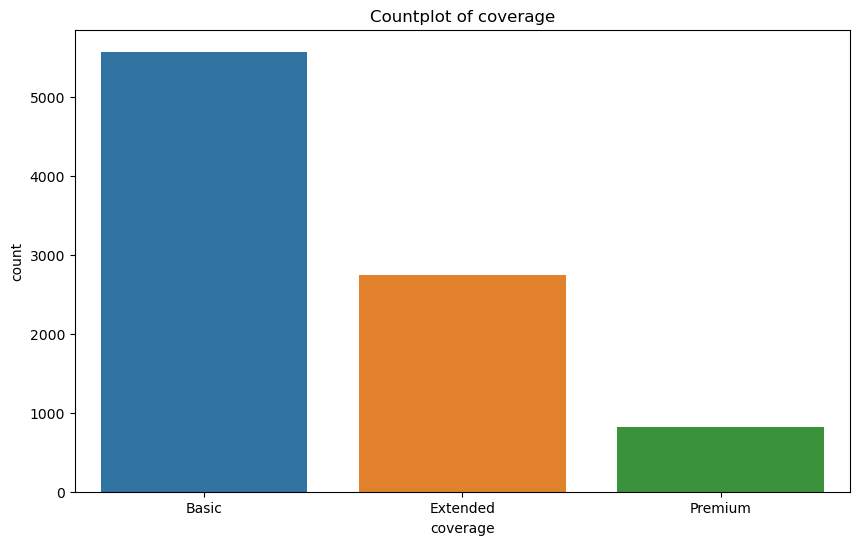

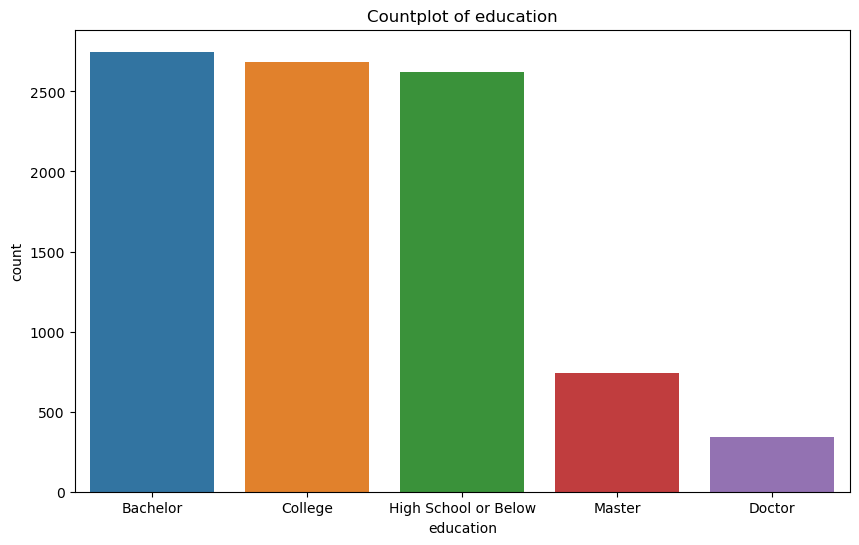

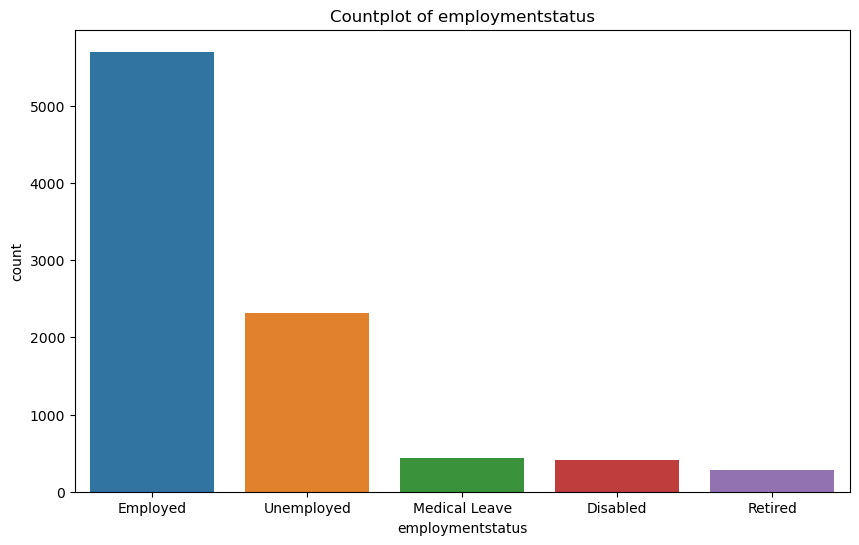

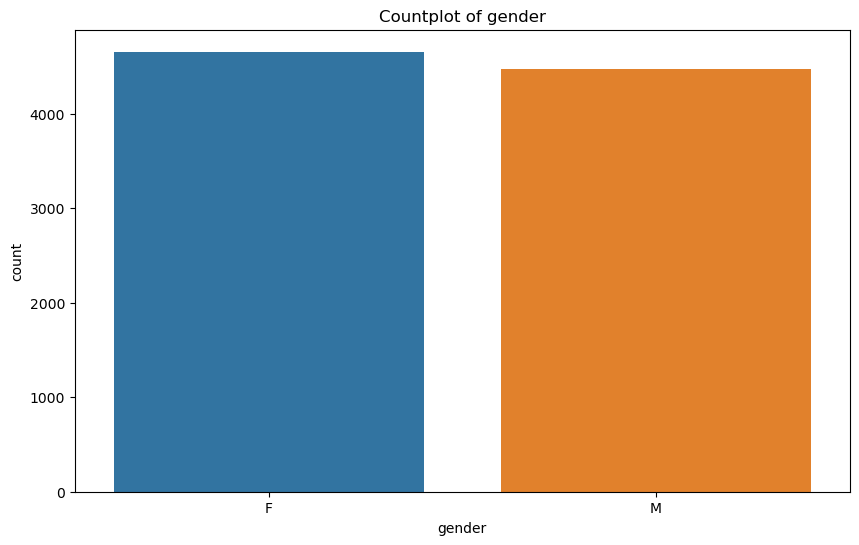

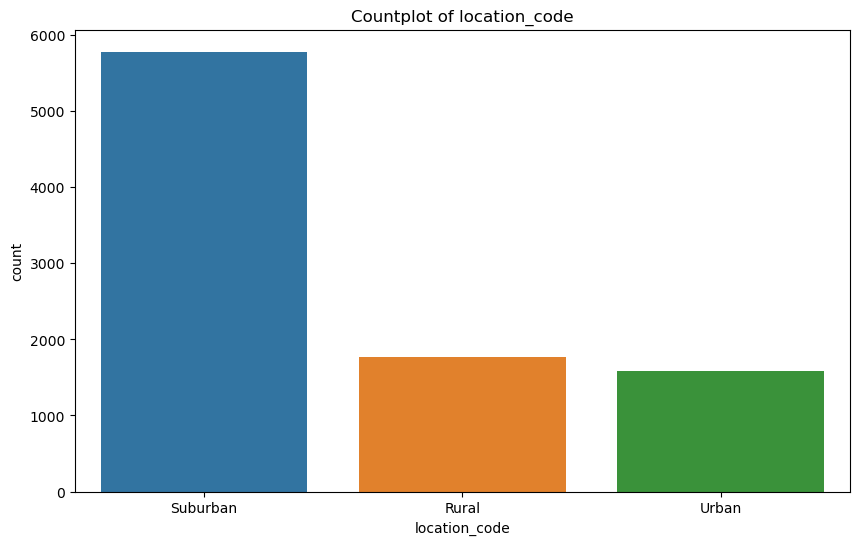

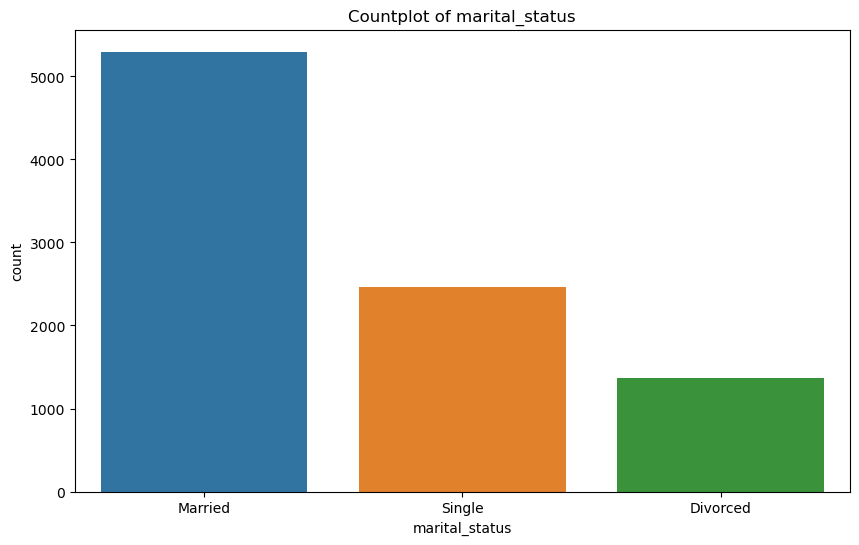

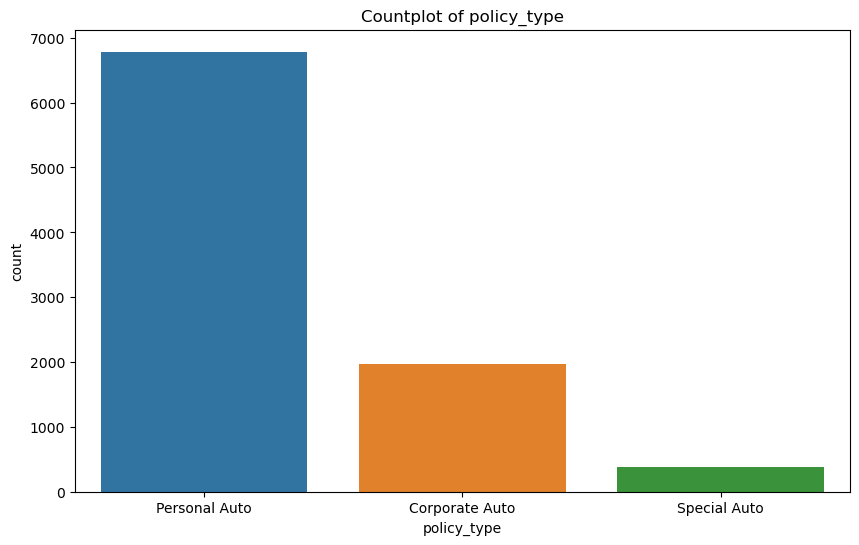

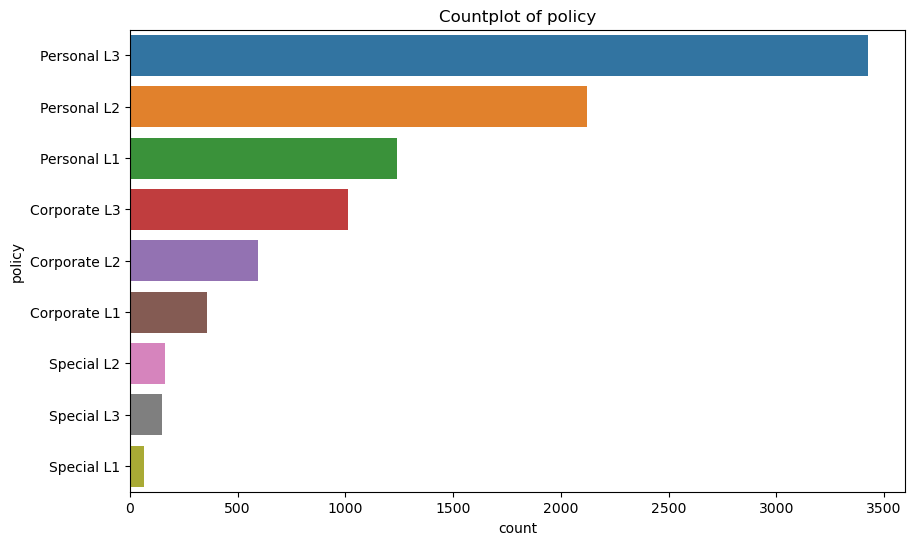

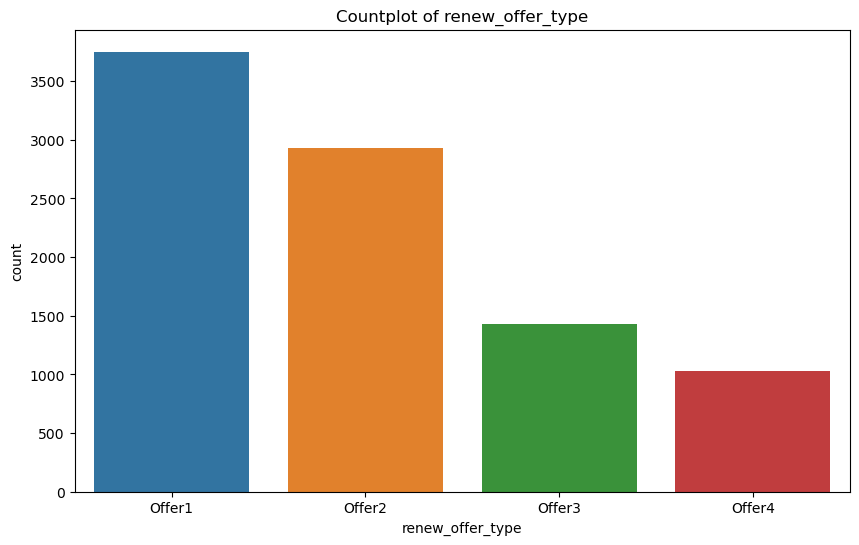

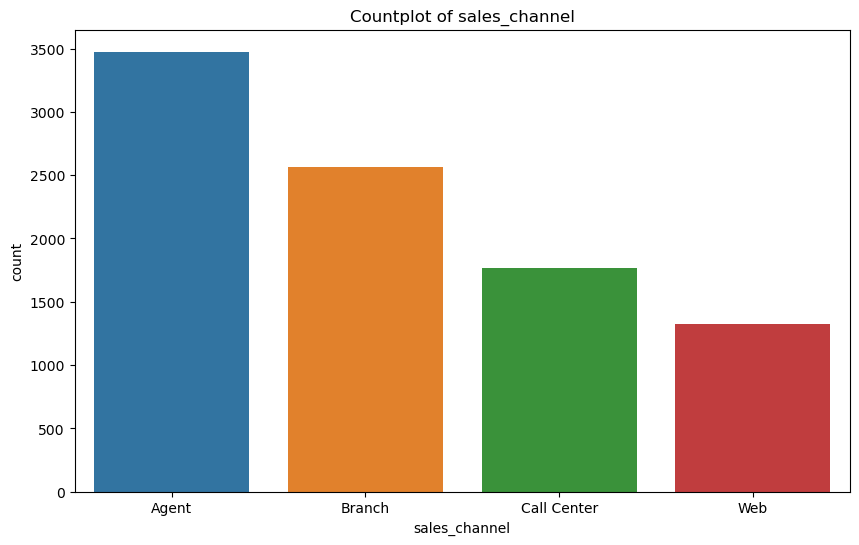

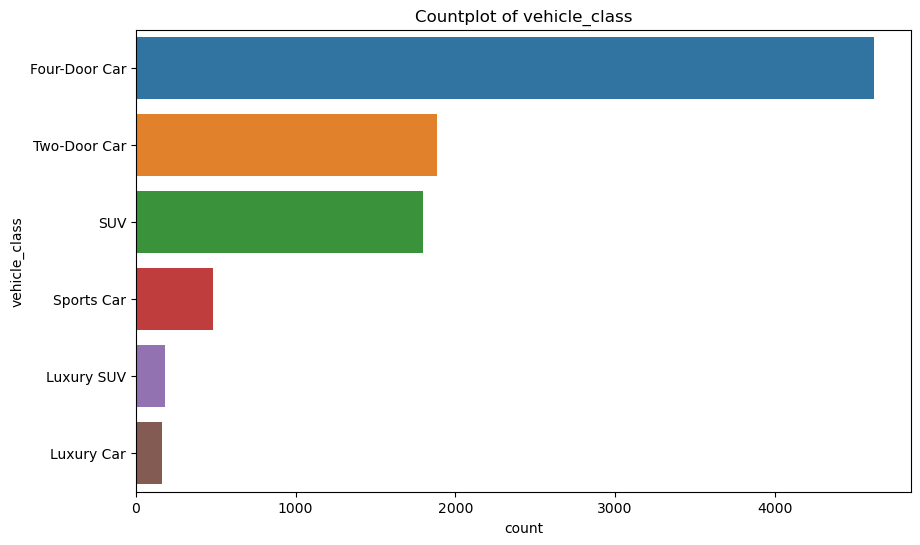

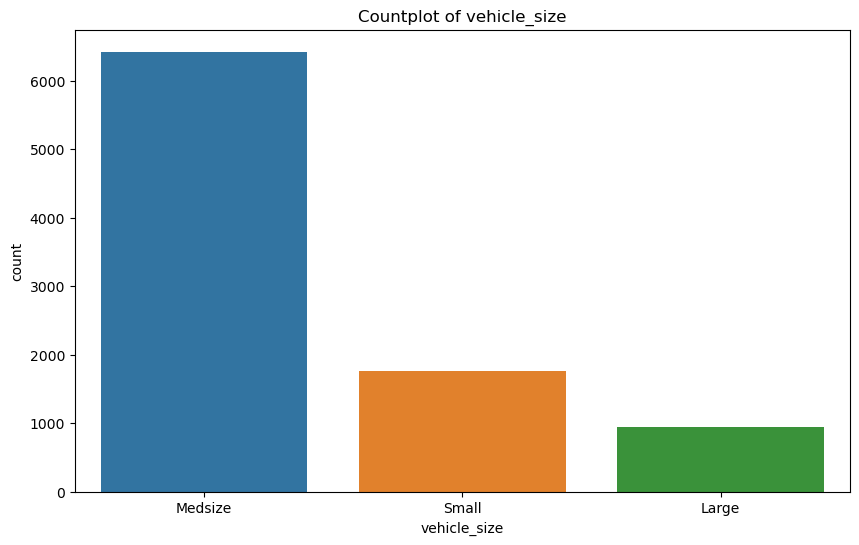

In [31]:
plot_categorical(categorical_df)

In [32]:
def count_plots(df: pd.DataFrame):
   
    
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    categorical_df = df[categorical_columns]

   

    for col in categorical_df.columns:
        sns.countplot(data=df, y=categorical_df[col], order= categorical_df[col].value_counts(dropna=False).index)
        plt.show()

    
   


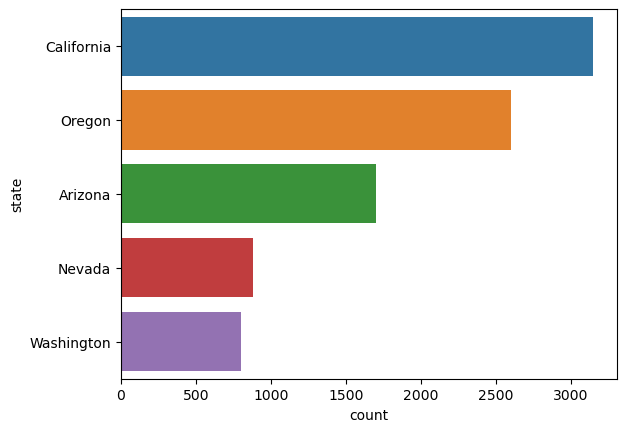

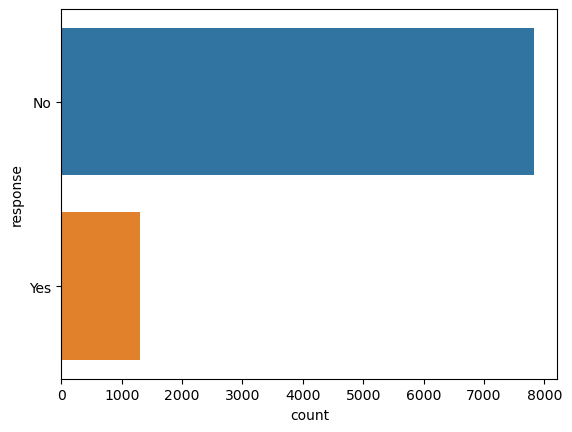

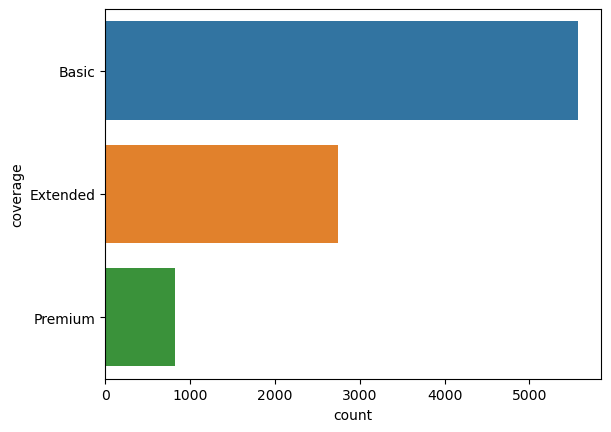

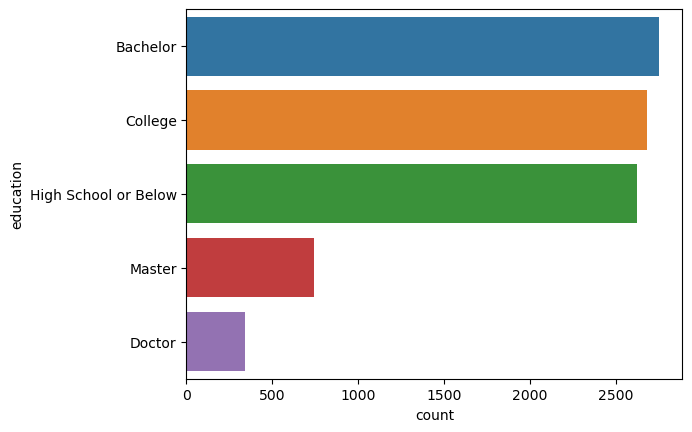

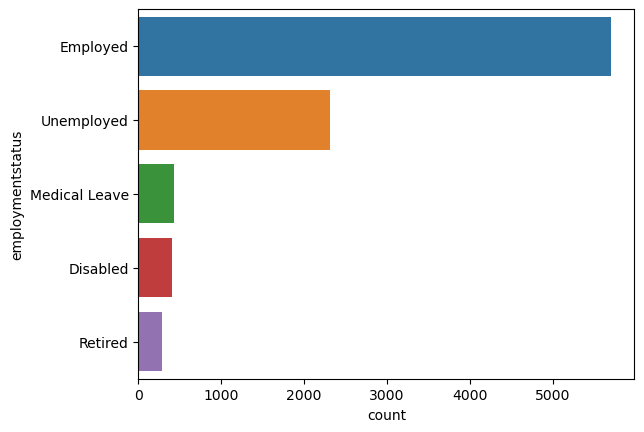

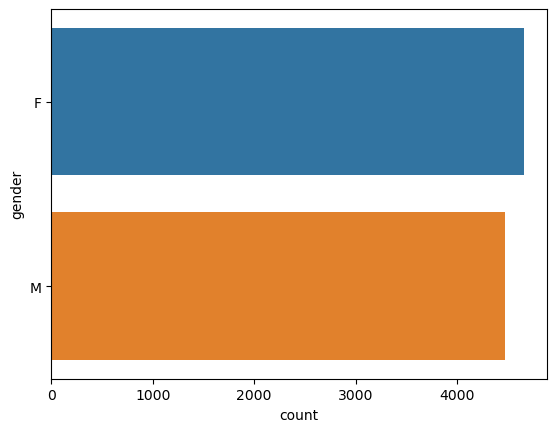

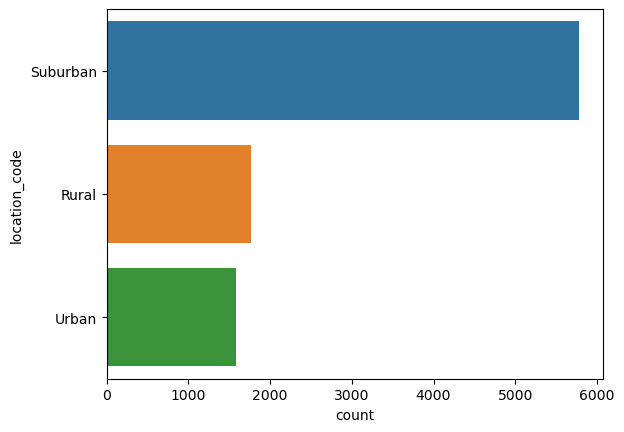

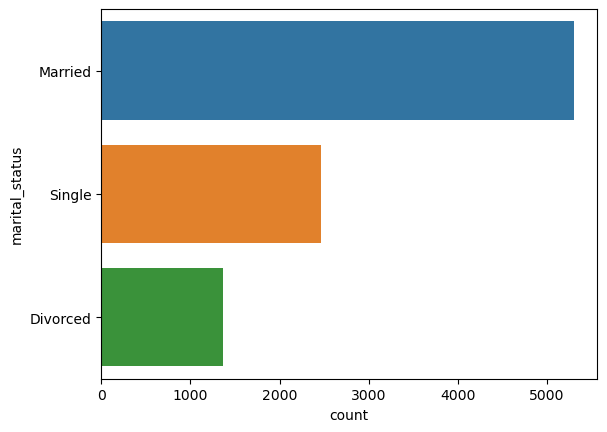

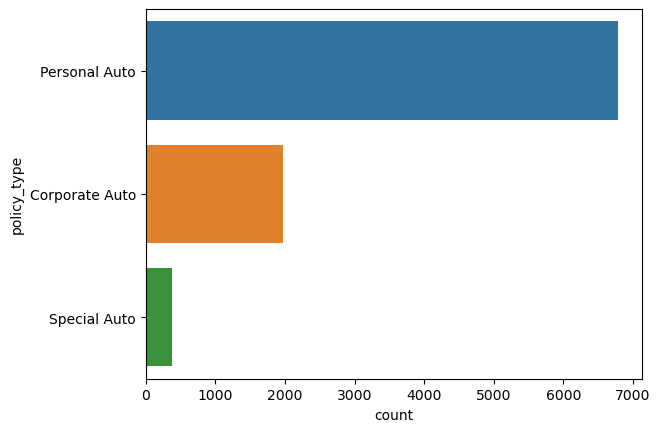

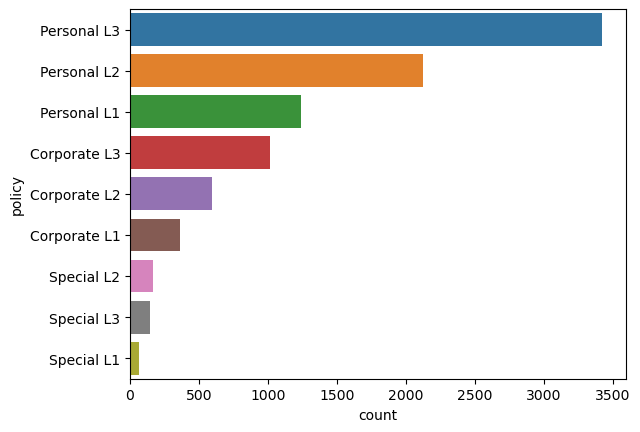

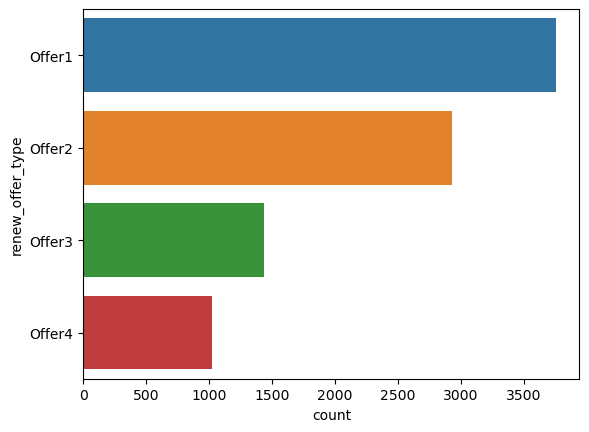

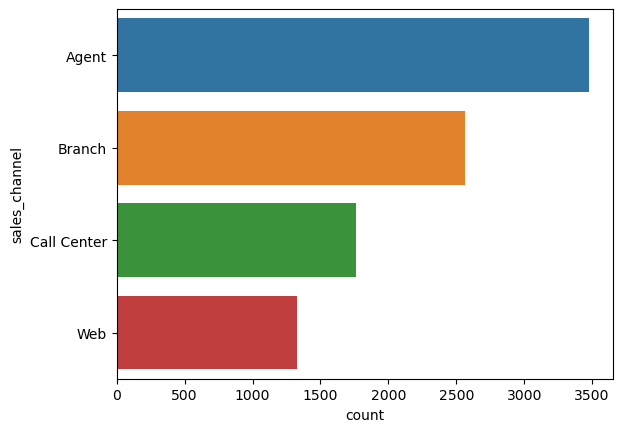

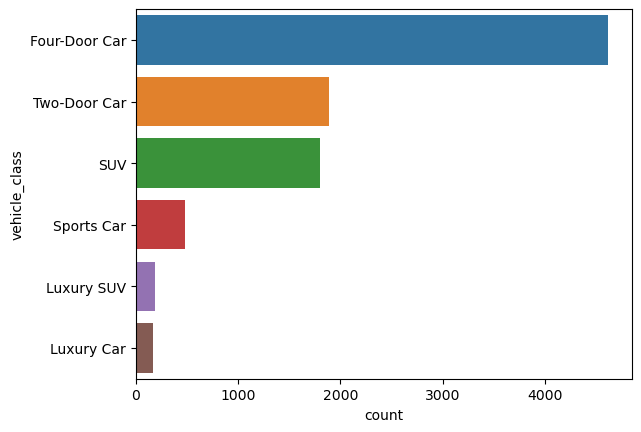

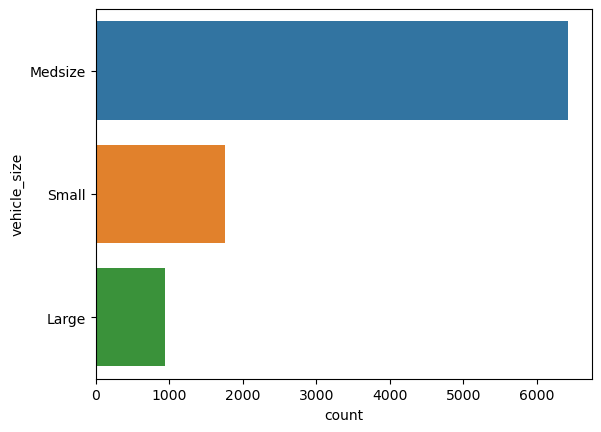

In [33]:
count_plots(categorical_df)

policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [34]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [35]:
def transform_policy(df: pd.DataFrame)-> pd.DataFrame:
    df = df.drop(columns=['policy_type'])
    df['policy'] = df['policy'].apply(lambda x: 'L1' if 'L1' in x else ('L2' if 'L2' in x else 'L3'))
    return df

In [36]:
categorical_df = transform_policy(categorical_df)

Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

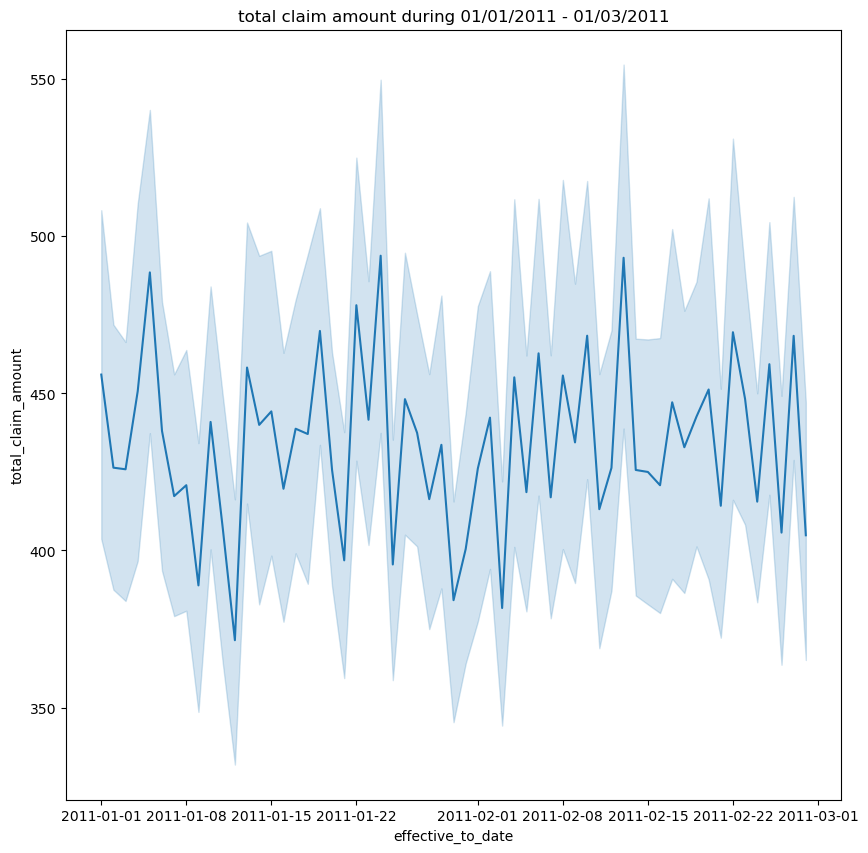

In [37]:

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount', ax=ax)

ax.set_title("total claim amount during 01/01/2011 - 01/03/2011")
plt.show()

To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

In [38]:
import pandas as pd

def create_dataframe(df: pd.DataFrame)-> pd.DataFrame:
    # Create an empty DataFrame
    new_df = pd.DataFrame()

    # Add new columns
    new_df['day'] = df['effective_to_date'].dt.day
    new_df['day_name'] = df['effective_to_date'].dt.day_name()
    new_df['week'] = df['effective_to_date'].dt.isocalendar().week
    new_df['month'] = df['effective_to_date'].dt.month_name()
    new_df['total_claim_amount'] = df['total_claim_amount']

    return new_df

In [39]:
new_df = create_dataframe(customer_df)
new_df

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)


In [40]:
aggregated = new_df.groupby(new_df['day_name']).agg({'total_claim_amount':'sum'}).round(2)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

aggregated = aggregated.reindex(day_order)
aggregated

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


In [41]:
aggregated.columns

Index(['total_claim_amount'], dtype='object')

In [42]:
def aggregate_and_reorder(df: pd.DataFrame, month_or_day_name: str, target_column: str, day_order: list)-> pd.DataFrame:
    # Compute total of target column aggregated by day_name
    aggregated = df.groupby(df[month_or_day_name])[target_column].sum().round(2)

    # Reorder the index
    aggregated = aggregated.reindex(day_order)

    return aggregated

In [43]:
aggregate_and_reorder(new_df, 'day_name', 'total_claim_amount', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  )

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

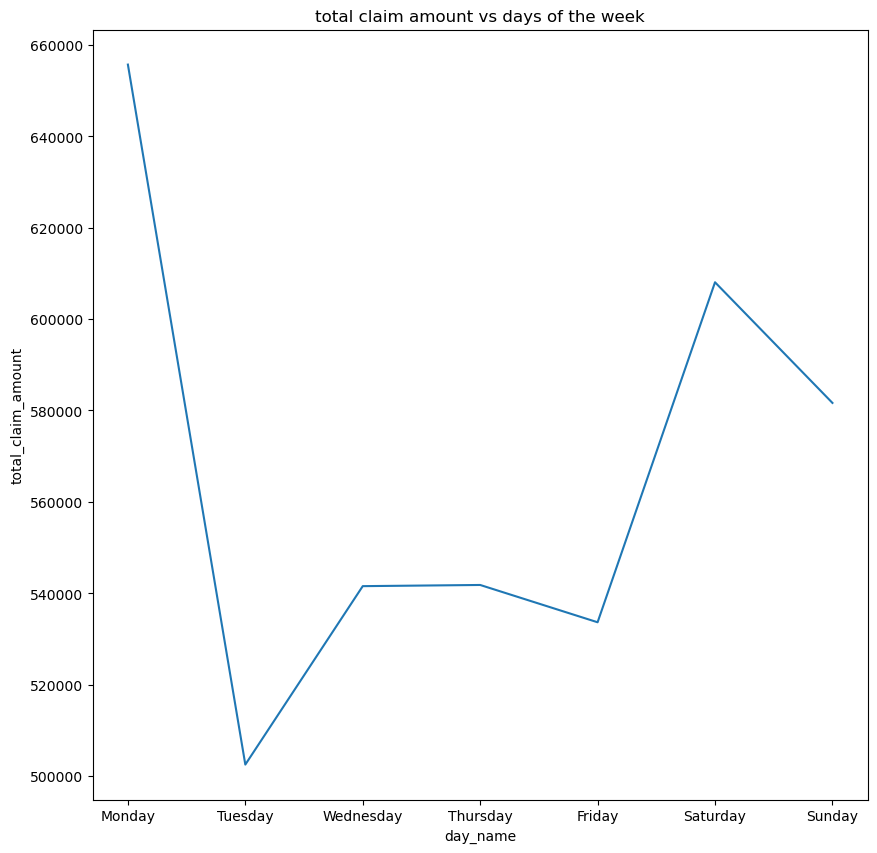

In [44]:

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=aggregated, x='day_name', y='total_claim_amount', ax=ax)

ax.set_title("total claim amount vs days of the week")
plt.show()

Monday is the day of the week with the highest total claim amount, followed by saturday. Tuesda is the day of the week with the lowest claim amount, followed by Wednesday and Thursday. 

Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [45]:
new_df['number_of_open_complaints'] = customer_df['number_of_open_complaints']
new_df

,day,day_name,week,month,total_claim_amount,number_of_open_complaints
0,24,Thursday,8,February,384.811147,0
1,31,Monday,5,January,1131.464935,0
2,19,Saturday,7,February,566.472247,0
3,20,Thursday,3,January,529.881344,0
4,3,Thursday,5,February,138.130879,0
...,...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764,0
9130,12,Saturday,6,February,379.200000,0
9131,6,Sunday,5,February,790.784983,3
9132,3,Thursday,5,February,691.200000,0


In [46]:
aggregate_and_reorder(new_df, 'day_name', 'number_of_open_complaints', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

day_name
Monday       652
Tuesday      456
Wednesday    422
Thursday     446
Friday       458
Saturday     530
Sunday       547
Name: number_of_open_complaints, dtype: int64

Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [47]:
aggregated_weeks = new_df.groupby(new_df['day_name'])['total_claim_amount'].median() #agg({'total_claim_amount':'median'})


day_order_weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

aggregated_weeks = pd.DataFrame(aggregated_weeks.sort_values(ascending=False))

aggregated_weeks

,total_claim_amount
day_name,
Thursday,395.328407
Wednesday,392.235698
Monday,385.735705
Sunday,383.721164
Saturday,379.200000
Tuesday,378.490829
Friday,371.803029


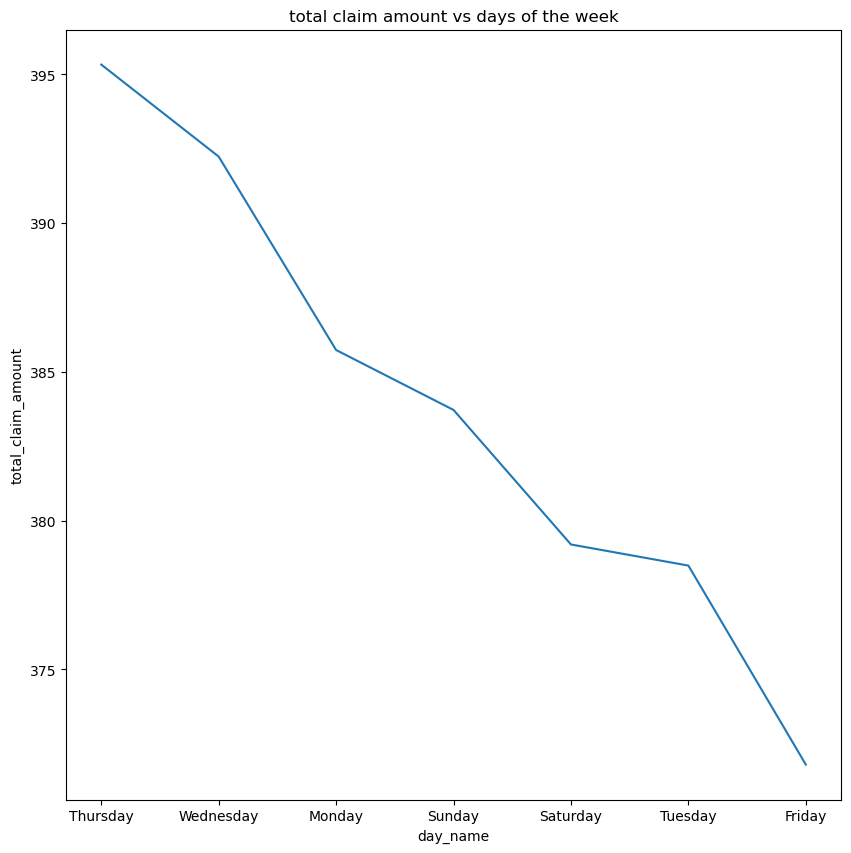

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=aggregated_weeks, x='day_name', y='total_claim_amount', ax=ax)

ax.set_title("total claim amount vs days of the week")
plt.show()

What can you conclude from this analysis?

Monday is the day of the week with the highest total claim amount, followed by saturday. Tuesday is the day of the week with the lowest claim amount, followed by Wednesday and Thursday. 

Despite the fact that Thursday and Wednesdy are the days of the week the lowest claim amount they are the days of the week with the highest median total claim amount, followed by Monday. The majority of the claim values are found around $395 and $371.

11.Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [49]:
new_df.columns

Index(['day', 'day_name', 'week', 'month', 'total_claim_amount',
       'number_of_open_complaints'],
      dtype='object')

In [50]:
new_df['month'].value_counts()

January     4898
February    4236
Name: month, dtype: int64

In [51]:
aggregate_and_reorder(new_df, 'month', 'total_claim_amount', ['January', 'February'])

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

Can you do a monthly analysis given the output of the previous series? Why?

Well, I can see that the total_claim_amount around $130000 higher in January compared to February. But this information is short. To make a year analysis I need the information related to the rest of the months.

Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [52]:
# def remove_outliers(df, column, thr=3):
#     mean = df[column].mean()
#     std = df[column].std()
    
#     # Define the upper and lower bounds for outliers
#     lower_bound = mean - thr * std
#     upper_bound = mean + thr * std
    
#     # Filter the data frame to remove outliers
#     df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
#     return df_no_outliers

In [53]:
def remove_outliers(df: pd.DataFrame, thr: int=3)-> pd.DataFrame:

    for column in df.columns:

        mean = df[column].mean()
        std = df[column].std()
        
        # Define the upper and lower bounds for outliers
        lower_bound = mean - thr * std
        upper_bound = mean + thr * std
        
        # Filter the data frame to remove outliers
        df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_no_outliers

Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [54]:
continuous_cleaned_df = remove_outliers(continuous_df)
continuous_cleaned_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [55]:
new_df = new_df.drop(columns={'number_of_open_complaints'})

In [56]:
concatenated_df = pd.concat([categorical_df, continuous_cleaned_df, discrete_df, new_df], axis=1 )
concatenated_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,5.0,384.811147,32,0,1,24,Thursday,8,February,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,...,42.0,1131.464935,13,0,8,31,Monday,5,January,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,38.0,566.472247,18,0,2,19,Saturday,7,February,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,65.0,529.881344,18,0,7,20,Thursday,3,January,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,44.0,138.130879,12,0,1,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,...,89.0,198.234764,18,0,2,10,Thursday,6,February,198.234764
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,28.0,379.200000,14,0,1,12,Saturday,6,February,379.200000
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,37.0,790.784983,9,3,2,6,Sunday,5,February,790.784983
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,3.0,691.200000,34,0,3,3,Thursday,5,February,691.200000


In [57]:
concatenated_df.dropna(inplace=True)

In [58]:
concatenated_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'day', 'day_name', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

Turn the response column values into (Yes=1/No=0).

In [59]:
concatenated_df['response'] = concatenated_df['response'].apply(lambda x:1 if 'Yes' in x else 0)
concatenated_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,5.0,384.811147,32,0,1,24,Thursday,8,February,384.811147
1,Arizona,0,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,...,42.0,1131.464935,13,0,8,31,Monday,5,January,1131.464935
2,Nevada,0,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,38.0,566.472247,18,0,2,19,Saturday,7,February,566.472247
3,California,0,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,65.0,529.881344,18,0,7,20,Thursday,3,January,529.881344
4,Washington,0,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,44.0,138.130879,12,0,1,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,...,89.0,198.234764,18,0,2,10,Thursday,6,February,198.234764
9130,California,1,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,28.0,379.200000,14,0,1,12,Saturday,6,February,379.200000
9131,California,0,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,37.0,790.784983,9,3,2,6,Sunday,5,February,790.784983
9132,California,0,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,3.0,691.200000,34,0,3,3,Thursday,5,February,691.200000


In [60]:
concatenated_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,5.0,384.811147,32,0,1,24,Thursday,8,February,384.811147
1,Arizona,0,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,...,42.0,1131.464935,13,0,8,31,Monday,5,January,1131.464935
2,Nevada,0,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,38.0,566.472247,18,0,2,19,Saturday,7,February,566.472247
3,California,0,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,65.0,529.881344,18,0,7,20,Thursday,3,January,529.881344
4,Washington,0,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,44.0,138.130879,12,0,1,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,...,89.0,198.234764,18,0,2,10,Thursday,6,February,198.234764
9130,California,1,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,28.0,379.200000,14,0,1,12,Saturday,6,February,379.200000
9131,California,0,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,37.0,790.784983,9,3,2,6,Sunday,5,February,790.784983
9132,California,0,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,3.0,691.200000,34,0,3,3,Thursday,5,February,691.200000


Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [61]:
def cleanOperation(x): 
    x = x.lower()
    if "master" in x:
        return "Graduate"
    elif "doctor" in x:
        return "Graduate"
    else:
        return x

# data['operation'] = data['operation'].apply(cleanOperation)    
concatenated_df['education'] = list(map(cleanOperation, concatenated_df['education']))

In [62]:
concatenated_df['education'].value_counts()

bachelor                2704
college                 2639
high school or below    2554
Graduate                1079
Name: education, dtype: int64

Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [63]:
concatenated_df['employmentstatus'] = concatenated_df['employmentstatus'].apply(lambda x: "Inactive"  if "Medical Leave" in x else ("Inactive"  if "Disabled" in x else x))


In [64]:
concatenated_df['employmentstatus'].value_counts(dropna=False)

Employed      5651
Unemployed    2216
Inactive       827
Retired        282
Name: employmentstatus, dtype: int64

Deal with column Gender turning the values into (1/0).

In [65]:
concatenated_df['gender'].value_counts()

F    4600
M    4376
Name: gender, dtype: int64

In [66]:
concatenated_df['gender'] = concatenated_df['gender'].apply(lambda x:1 if 'F' in x else 0)
concatenated_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,bachelor,Employed,1,Suburban,Married,L3,Offer1,...,5.0,384.811147,32,0,1,24,Thursday,8,February,384.811147
1,Arizona,0,Extended,bachelor,Unemployed,1,Suburban,Single,L3,Offer3,...,42.0,1131.464935,13,0,8,31,Monday,5,January,1131.464935
2,Nevada,0,Premium,bachelor,Employed,1,Suburban,Married,L3,Offer1,...,38.0,566.472247,18,0,2,19,Saturday,7,February,566.472247
3,California,0,Basic,bachelor,Unemployed,0,Suburban,Married,L2,Offer1,...,65.0,529.881344,18,0,7,20,Thursday,3,January,529.881344
4,Washington,0,Basic,bachelor,Employed,0,Rural,Single,L1,Offer1,...,44.0,138.130879,12,0,1,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,Basic,bachelor,Employed,0,Urban,Married,L1,Offer2,...,89.0,198.234764,18,0,2,10,Thursday,6,February,198.234764
9130,California,1,Extended,college,Employed,1,Suburban,Divorced,L3,Offer1,...,28.0,379.200000,14,0,1,12,Saturday,6,February,379.200000
9131,California,0,Extended,bachelor,Unemployed,0,Suburban,Single,L2,Offer1,...,37.0,790.784983,9,3,2,6,Sunday,5,February,790.784983
9132,California,0,Extended,college,Employed,0,Suburban,Married,L2,Offer3,...,3.0,691.200000,34,0,3,3,Thursday,5,February,691.200000


Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [67]:
concatenated_df['vehicle_class'] = concatenated_df['vehicle_class'].apply(lambda x: "Luxury"  if "Sports Car" in x else ("Luxury"  if "Luxury SUV" in x else ('Luxury' if "Luxury Car" in x else x)))
concatenated_df['vehicle_class'].value_counts()

Four-Door Car    4619
Two-Door Car     1886
SUV              1765
Luxury            706
Name: vehicle_class, dtype: int64

In [68]:
concatenated_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'day', 'day_name', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [69]:
coverage_mapping = {"Basic": 1, "Extended": 2, "Premium": 3}
concatenated_df['coverage'] = concatenated_df['coverage'].map(coverage_mapping)


In [70]:
concatenated_df['coverage'].value_counts()

1    5507
2    2699
3     770
Name: coverage, dtype: int64

Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [71]:
coverage_mapping1 = {"Unemployed": 1, "Inactive": 2, "Employed": 3}
concatenated_df['employmentstatus'] = concatenated_df['employmentstatus'].map(coverage_mapping1)

In [72]:
concatenated_df['employmentstatus'].value_counts(dropna= False)

3.0    5651
1.0    2216
2.0     827
NaN     282
Name: employmentstatus, dtype: int64

Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [73]:
coverage_mapping2 = {"Rural": 1, "Suburban": 2, "Urban": 3}
concatenated_df['location_code'] = concatenated_df['location_code'].map(coverage_mapping2)

In [74]:
concatenated_df['location_code'].value_counts()

2    5621
1    1773
3    1582
Name: location_code, dtype: int64

Encode the column vehicle_size as: "Large" > "Medsize" > "Small".


In [75]:
coverage_mapping3 = {"Small": 1, "Medsize": 2, "Large": 3}
concatenated_df['vehicle_size'] = concatenated_df['vehicle_size'].map(coverage_mapping3)

In [76]:
concatenated_df['vehicle_size'].value_counts()

2    6315
1    1736
3     925
Name: vehicle_size, dtype: int64

Get a dataframe with the categorical nominal columns

In [77]:
categorical_df_final, numerical_df_final = split_num_cat(concatenated_df)
categorical_df_final

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
0,Washington,bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday,February
1,Arizona,bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday,January
2,Nevada,bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday,February
3,California,bachelor,Married,L2,Offer1,Call Center,SUV,Thursday,January
4,Washington,bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday,February
...,...,...,...,...,...,...,...,...,...
9129,California,bachelor,Married,L1,Offer2,Web,Four-Door Car,Thursday,February
9130,California,college,Divorced,L3,Offer1,Branch,Four-Door Car,Saturday,February
9131,California,bachelor,Single,L2,Offer1,Branch,Four-Door Car,Sunday,February
9132,California,college,Married,L2,Offer3,Branch,Four-Door Car,Thursday,February


Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

In [78]:
def get_nominal_levels(df: pd.DataFrame)-> list:
    # Initialize an empty list to store the levels
    levels = []

    # Loop over all columns in the DataFrame
    for column in df.columns:
        # Check if the column is categorical
        if df[column].dtype == 'object':
            # Get the unique values in the column and convert them to a list
            unique_values = df[column].unique().tolist()
            
            # Append the list of unique values to the levels list
            levels.append(unique_values)

    return levels

In [79]:
levels = get_nominal_levels(categorical_df_final)

levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['bachelor', 'college', 'Graduate', 'high school or below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday'],
 ['February', 'January']]

Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [80]:

from sklearn.preprocessing import OneHotEncoder

#categories_values = [list(data[col].unique()) for col in X_train_categorical.columns]
encoder = OneHotEncoder(handle_unknown='error', drop='first', categories=levels)
# encoder.fit(X_train_df1)
df_encoded = encoder.fit_transform(categorical_df_final)

df_encoded = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out())

display(df_encoded)





,state_Arizona,state_Nevada,state_California,state_Oregon,education_college,education_Graduate,education_high school or below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8972,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8973,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8974,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lab | Comparing regression models

Define X and y

In [81]:
numerical_df_final.columns

Index(['response', 'coverage', 'employmentstatus', 'gender', 'location_code',
       'vehicle_size', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_policy_inception',
       'total_claim_amount', 'total_claim_amount', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'day', 'week',
       'total_claim_amount', 'total_claim_amount'],
      dtype='object')

In [82]:
categorical_df_final.columns

Index(['state', 'education', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'day_name', 'month'],
      dtype='object')

In [83]:
nan_columns = concatenated_df.columns[concatenated_df.isna().any()].tolist()
nan_columns

['employmentstatus']

In [84]:
concatenated_df = concatenated_df[concatenated_df['employmentstatus'].isna()==False].reset_index(drop=True)
concatenated_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,1,bachelor,3.0,1,2,Married,L3,Offer1,...,5.0,384.811147,32,0,1,24,Thursday,8,February,384.811147
1,Arizona,0,2,bachelor,1.0,1,2,Single,L3,Offer3,...,42.0,1131.464935,13,0,8,31,Monday,5,January,1131.464935
2,Nevada,0,3,bachelor,3.0,1,2,Married,L3,Offer1,...,38.0,566.472247,18,0,2,19,Saturday,7,February,566.472247
3,California,0,1,bachelor,1.0,0,2,Married,L2,Offer1,...,65.0,529.881344,18,0,7,20,Thursday,3,January,529.881344
4,Washington,0,1,bachelor,3.0,0,1,Single,L1,Offer1,...,44.0,138.130879,12,0,1,3,Thursday,5,February,138.130879


In [85]:
y = concatenated_df.iloc[:,-1]
X = concatenated_df.drop(columns=['total_claim_amount'], axis=1)

In [86]:
X.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'day', 'day_name',
       'week', 'month'],
      dtype='object')

In [87]:
type(y)

pandas.core.series.Series

In [88]:
type(X)

pandas.core.frame.DataFrame

Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)


In [90]:
# Keep in mind that X_train, X_test and X_new have the same amount of columns. 
# We can use this information when we create the Pandas DataFrame.
X_train_df = pd.DataFrame(X_train, columns=X.columns, index=X_train.index)
X_test_df   = pd.DataFrame(X_test,  columns=X.columns, index=X_test.index)

X_train_num = X_train_df.select_dtypes(np.number)
X_test_num  = X_test_df.select_dtypes(np.number)

X_train_cat = X_train_df.select_dtypes('object')
X_test_cat  = X_test_df.select_dtypes('object')


In [91]:
import pickle
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

pt.fit(X_train_num) # fit() Determine the min and the max of each column in the TRAIN set

path = "./"
scaler_file_name = "min_max_scaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(pt, file)

X_train_scaled_num = pt.transform(X_train_num) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled_num  = pt.transform(X_test_num ) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df_num = pd.DataFrame(X_train_scaled_num, columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled_df_num  = pd.DataFrame(X_test_scaled_num,  columns=X_test_num.columns, index=X_test_num.index)

X_train_scaled_df_num.head()

,response,coverage,employmentstatus,gender,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,week
3264,-0.383728,-0.790531,0.724087,0.974203,0.041929,0.158779,-1.649661,0.296173,-1.345946,0.917274,0.413027,-0.50986,-1.151375,-1.209600,0.296793
6722,-0.383728,-0.790531,0.724087,0.974203,0.041929,-1.670198,-0.558480,0.863776,0.818782,0.946761,-0.141877,1.91343,-1.151375,-0.064151,-0.961065
5987,-0.383728,-0.790531,0.724087,0.974203,0.041929,0.158779,-1.557976,0.146497,-1.163721,-1.421506,0.579554,-0.50986,-1.151375,1.628779,0.296793
2444,-0.383728,-0.790531,0.724087,-1.026480,0.041929,-1.670198,-0.341066,0.824697,1.148746,-0.822030,0.326778,-0.50986,-1.151375,-0.536345,0.536920
5446,-0.383728,1.142938,-1.517779,-1.026480,0.041929,0.158779,-0.269743,-1.631083,1.455713,-1.706696,0.326778,-0.50986,-1.151375,-0.414052,-0.961065


Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [92]:

#categories_values = [list(data[col].unique()) for col in X_train_categorical.columns]
encoder = OneHotEncoder(handle_unknown='error', drop='first', categories=levels)
encoder.fit(X_train_cat)

X_train_cat_np = encoder.transform(X_train_cat).toarray()
X_test_cat_np  = encoder.transform(X_test_cat).toarray()

X_train_cat = pd.DataFrame(X_train_cat_np, columns=encoder.get_feature_names_out(),index=X_train_df.index)
X_test_cat  = pd.DataFrame(X_test_cat_np,  columns=encoder.get_feature_names_out(),index=X_test_df.index)


display(X_train_cat.head())
display(X_test_cat.head())

,state_Arizona,state_Nevada,state_California,state_Oregon,education_college,education_Graduate,education_high school or below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
3264,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5987,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2444,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5446,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,state_Arizona,state_Nevada,state_California,state_Oregon,education_college,education_Graduate,education_high school or below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
6522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
518,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6422,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8408,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [93]:
X_train_new = pd.concat([X_train_scaled_df_num , X_train_cat],axis=1)
X_test_new = pd.concat([X_test_scaled_df_num ,  X_test_cat ],axis=1)
X_train_new.head()

,response,coverage,employmentstatus,gender,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
3264,-0.383728,-0.790531,0.724087,0.974203,0.041929,0.158779,-1.649661,0.296173,-1.345946,0.917274,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6722,-0.383728,-0.790531,0.724087,0.974203,0.041929,-1.670198,-0.558480,0.863776,0.818782,0.946761,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5987,-0.383728,-0.790531,0.724087,0.974203,0.041929,0.158779,-1.557976,0.146497,-1.163721,-1.421506,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2444,-0.383728,-0.790531,0.724087,-1.026480,0.041929,-1.670198,-0.341066,0.824697,1.148746,-0.822030,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5446,-0.383728,1.142938,-1.517779,-1.026480,0.041929,0.158779,-0.269743,-1.631083,1.455713,-1.706696,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [94]:
X_train_new.columns

Index(['response', 'coverage', 'employmentstatus', 'gender', 'location_code',
       'vehicle_size', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'day', 'week', 'state_Arizona', 'state_Nevada',
       'state_California', 'state_Oregon', 'education_college',
       'education_Graduate', 'education_high school or below',
       'marital_status_Single', 'marital_status_Divorced', 'policy_L2',
       'policy_L1', 'renew_offer_type_Offer3', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer4', 'sales_channel_Call Center',
       'sales_channel_Web', 'sales_channel_Branch',
       'vehicle_class_Four-Door Car', 'vehicle_class_SUV',
       'vehicle_class_Luxury', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Tuesday', 'day_name_Wednesday', 'day_name_Sunday',
       'day_name_Friday', 'month_January'],
      dtype='object')

Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

In [95]:
import pickle
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler = MinMaxScaler()

scaler.fit(X_train_new) # fit() Determine the min and the max of each column in the TRAIN set

path = "./"
scaler_file_name = "min_max_scaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled2 = scaler.transform(X_train_new) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled2  = scaler.transform(X_test_new) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_new_scaled_df2 = pd.DataFrame(X_train_scaled2, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled2_df2  = pd.DataFrame(X_test_scaled2,  columns=X_train_new.columns, index=X_test_new.index)

X_train_new_scaled_df2.head()

,response,coverage,employmentstatus,gender,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday,month_January
3264,0.0,0.000000,1.0,1.0,0.507278,0.488342,0.117139,0.709052,0.050275,0.809923,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6722,0.0,0.000000,1.0,1.0,0.507278,0.000000,0.333744,0.917878,0.603404,0.817859,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5987,0.0,0.000000,1.0,1.0,0.507278,0.488342,0.135339,0.653986,0.096837,0.180486,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2444,0.0,0.000000,1.0,0.0,0.507278,0.000000,0.376902,0.903501,0.687715,0.341823,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5446,0.0,0.814816,0.0,0.0,0.507278,0.488342,0.391060,0.000000,0.766151,0.103732,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [96]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_new_scaled_df2, y_train) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)

path = "./"
model_file_name = "linear_model.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(linear_model, file)

In [128]:
y_train_pred = linear_model.predict(X_train_new_scaled_df2)
y_test_pred  = linear_model.predict(X_test_new_scaled2_df2)

In [98]:
y_train_pred

array([204.7714431 , 430.29693173, 314.15995173, ..., 206.85568462,
       763.9085352 , 663.82075511])

In [111]:
y_test_pred

array([360.94389382, 415.59259046, 261.00517562, ..., 726.61062487,
       350.54348629, 495.16035129])

In [112]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.shape

(8694, 3)

In [99]:
import pandas as pd

def create_dataframe(y_true, y_pred):
    # Ensure that y_true and y_pred have the same length
    assert len(y_true) == len(y_pred), "Length of y_true and y_pred must be the same"

    # Calculate the error
    error = [abs(true - pred) for true, pred in zip(y_true, y_pred)]

    # Create a dictionary
    data = {
        "Real Values": y_true,
        "Predicted Values": y_pred,
        "Error": error
    }

    # Create a pandas DataFrame from the dictionary
    df = pd.DataFrame(data)

    return df

In [109]:
create_dataframe(y_train, y_train_pred)

,Real Values,Predicted Values,Error
3264,302.400000,204.771443,97.628557
6722,632.244063,430.296932,201.947131
5987,312.000000,314.159952,2.159952
2444,571.200000,504.632784,66.567216
5446,986.400000,784.361085,202.038915
...,...,...,...
5372,166.799814,116.113401,50.686413
28,532.800000,415.838386,116.961614
826,131.828507,206.855685,75.027178
3735,937.327881,763.908535,173.419346


In [113]:
create_dataframe(y_test, y_test_pred)

,Real Values,Predicted Values,Error
6522,200.490816,360.943894,160.453078
518,722.178166,415.592590,306.585576
6422,430.477436,261.005176,169.472260
3837,856.800000,705.400747,151.399253
8408,289.386343,401.934174,112.547831
...,...,...,...
8600,978.257137,565.974340,412.282797
7414,86.912677,133.427336,46.514659
6636,532.089467,726.610625,194.521158
6403,448.181396,350.543486,97.637910


Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def calculate_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    error_metrics_df = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })

    return error_metrics_df

In [107]:
calculate_error_metrics(y_train, y_train_pred)

,Error_metric,Value
0,MAE,128.650792
1,MSE,28298.420319
2,RMSE,168.221343
3,MAPE,163.022548
4,R2,0.526707


In [114]:
calculate_error_metrics(y_test, y_test_pred)

,Error_metric,Value
0,MAE,128.254005
1,MSE,27772.836815
2,RMSE,166.651843
3,MAPE,151.990238
4,R2,0.553520


In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def calculate_error_metrics(y_real_train, y_real_test, y_pred_train, y_pred_test):
    mae_train = mean_absolute_error(y_real_train, y_pred_train)
    mse_train = mean_squared_error(y_real_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_real_train, y_pred_train)

    mae_test = mean_absolute_error(y_real_test, y_pred_test)
    mse_test = mean_squared_error(y_real_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_real_test, y_pred_test)

    error_metrics_df = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train],
        'Test': [mae_test, mse_test, rmse_test, r2_test]
    })

    return error_metrics_df


In [116]:
calculate_error_metrics(y_train, y_test, y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,128.650792,128.254005
1,MSE,28298.420319,27772.836815
2,RMSE,168.221343,166.651843
3,R2,0.526707,0.553520


11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.


In [117]:
def train_models(models: list, X_train, y_train)-> list:
    trained_models = []
    for model in models:
        model.fit(X_train, y_train)
        trained_models.append(model)
    return trained_models


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor(max_iter=500, tol=0.0001)]

In [130]:
trained_models = train_models(models, X_train_scaled2, y_train)
for model in trained_models:
    y_train_pred = model.predict(X_train_scaled2)
    y_test_pred = model.predict(X_test_new_scaled2_df2)

    train_error_metrics = calculate_error_metrics(y_train, y_train_pred)
    test_error_metrics = calculate_error_metrics(y_test, y_test_pred)

    print(train_error_metrics)
    print(test_error_metrics)

c:\Users\chech\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chech\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


  Error_metric         Value
0          MAE    128.650792
1          MSE  28298.420319
2         RMSE    168.221343
3         MAPE    163.022548
4           R2      0.526707
  Error_metric         Value
0          MAE    128.254005
1          MSE  27772.836815
2         RMSE    166.651843
3         MAPE    151.990238
4           R2      0.553520


c:\Users\chech\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


  Error_metric         Value
0          MAE    111.152436
1          MSE  23621.227638
2         RMSE    153.691990
3         MAPE    175.743496
4           R2      0.604933
  Error_metric         Value
0          MAE    139.223768
1          MSE  35816.332383
2         RMSE    189.252034
3         MAPE    209.414773
4           R2      0.424212
  Error_metric         Value
0          MAE    110.122484
1          MSE  22347.672010
2         RMSE    149.491378
3         MAPE    128.019760
4           R2      0.626233
  Error_metric         Value
0          MAE    110.143287
1          MSE  22239.151933
2         RMSE    149.127972
3         MAPE    118.421552
4           R2      0.642480


c:\Users\chech\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
